In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("energydata_complete.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
# Attribute Information:

# date time year-month-day hour:minute:second
# Appliances, energy use in Wh
# lights, energy use of light fixtures in the house in Wh

# T1, Temperature in kitchen area, in Celsius
# RH_1, Humidity in kitchen area, in %
# T2, Temperature in living room area, in Celsius
# RH_2, Humidity in living room area, in %
# T3, Temperature in laundry room area
# RH_3, Humidity in laundry room area, in %
# T4, Temperature in office room, in Celsius
# RH_4, Humidity in office room, in %
# T5, Temperature in bathroom, in Celsius
# RH_5, Humidity in bathroom, in %
# T6, Temperature outside the building (north side), in Celsius
# RH_6, Humidity outside the building (north side), in %
# T7, Temperature in ironing room , in Celsius
# RH_7, Humidity in ironing room, in %
# T8, Temperature in teenager room 2, in Celsius
# RH_8, Humidity in teenager room 2, in %
# T9, Temperature in parents room, in Celsius
# RH_9, Humidity in parents room, in %

# To, Temperature outside (from Chievres weather station), in Celsius
# RH_out, Humidity outside (from Chievres weather station), in %

# Pressure (from Chievres weather station), in mm Hg
# Wind speed (from Chievres weather station), in m/s
# Visibility (from Chievres weather station), in km
# Tdewpoint (from Chievres weather station), Â°C
# rv1, Random variable 1, nondimensional
# rv2, Random variable 2, nondimensional

# Where indicated, hourly data (then interpolated) from the nearest airport weather station
# (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru.
# Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
# No missing value
df.isnull().sum() / df.shape[0]

date           0.0
Appliances     0.0
lights         0.0
T1             0.0
RH_1           0.0
T2             0.0
RH_2           0.0
T3             0.0
RH_3           0.0
T4             0.0
RH_4           0.0
T5             0.0
RH_5           0.0
T6             0.0
RH_6           0.0
T7             0.0
RH_7           0.0
T8             0.0
RH_8           0.0
T9             0.0
RH_9           0.0
T_out          0.0
Press_mm_hg    0.0
RH_out         0.0
Windspeed      0.0
Visibility     0.0
Tdewpoint      0.0
rv1            0.0
rv2            0.0
dtype: float64

In [11]:
df_num = df.apply(pd.to_numeric, errors='ignore')

In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [13]:
# Drop Cols We are not using
df_num.drop(["Press_mm_hg","Windspeed", "Visibility", "Tdewpoint", "rv1", "rv2"],axis=1,inplace=True)

In [15]:
# Convert date str to datetime
df_num['date'] = pd.to_datetime(df_num['date'], format='%Y-%m-%d %H:%M:%S')

In [34]:
energy = ['Appliances', 'lights']
temps = ["T1", 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
hums = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
df_num['T_in_avg'] = df_num[temps].sum(axis=1)/len(temps)
df_num['RH_in_avg'] = df_num[hums].sum(axis=1)/len(hums)
df_num['energy_avg'] = df_num[energy].sum(axis=1)/len(energy)

df_num.drop(temps+hums, axis=1,inplace=True)

In [47]:
df_num["year"] = df_num.apply(lambda x: str(x["date"].year),axis=1)
df_num["month"] = df_num.apply(lambda x: str(x["date"].month),axis=1)
df_num["day"] = df_num.apply(lambda x: str(x["date"].day),axis=1)
df_num["hour"] = df_num.apply(lambda x: str(x["date"].hour),axis=1)

In [48]:
print("first data point in time {}".format(df_num["date"].min()))
print("last data point in time {}".format(df_num["date"].max()))
print("\n")

first data point in time 2016-01-11 17:00:00
last data point in time 2016-05-27 18:00:00




In [49]:
df_num.describe()
# Use this table to know the average, min and max temp, relative humidity and energy

,Appliances,lights,T_out,RH_out,T_in_avg,RH_in_avg,energy_avg
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,7.411665,79.750418,19.381758,42.709411,50.748417
std,102.524891,7.935988,5.317409,14.901088,2.144506,5.958272,52.190414
min,10.000000,0.000000,-5.000000,24.000000,14.696049,27.526931,5.000000
25%,50.000000,0.000000,3.666667,70.333333,17.867037,38.441852,25.000000
50%,60.000000,0.000000,6.916667,83.666667,19.053333,42.450000,30.000000
75%,100.000000,0.000000,10.408333,91.666667,20.583704,47.318673,50.000000
max,1080.000000,70.000000,26.100000,100.000000,25.747280,59.053025,555.000000


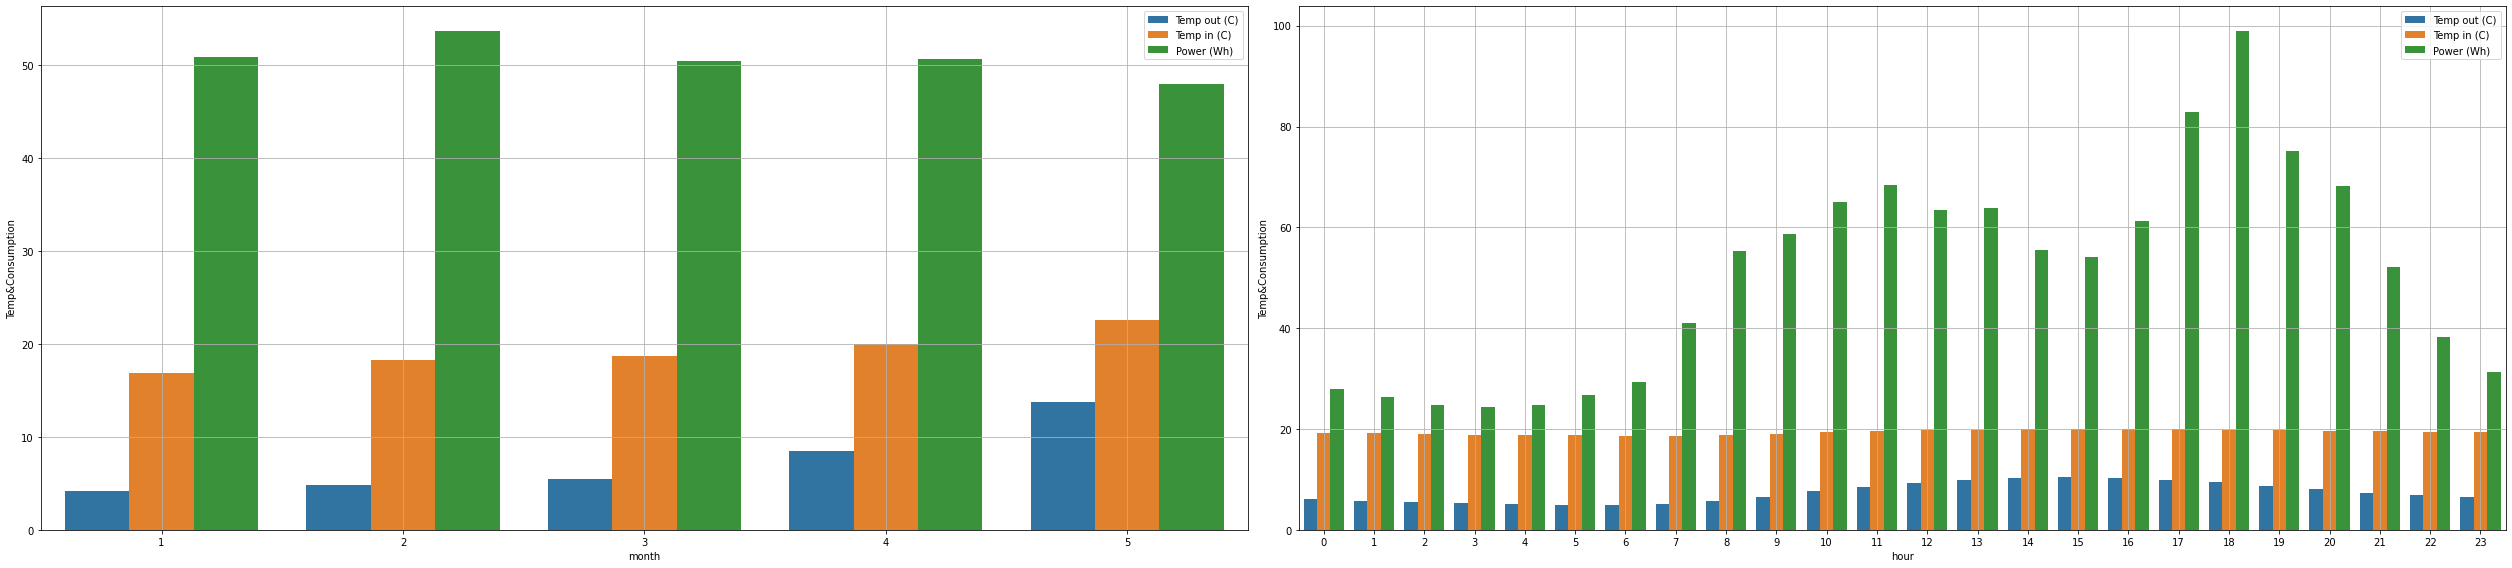

In [153]:
# how are the values distributed on months, days, hours for Temperature & Humidity?
month_temp_in = df_num.groupby("month")["T_in_avg"].mean()
month_temp_out = df_num.groupby("month")["T_out"].mean()
month_power = df_num.groupby("month")["energy_avg"].mean()
df_month = pd.DataFrame({
    'month': month_temp_in.index,
    'Temp out (C)': month_temp_out,
    'Temp in (C)': month_temp_in,
    'Power (Wh)': month_power
}, index=month_temp_in.index)
df_month = pd.melt(df_month, id_vars="month",  var_name="", value_name="Temp&Consumption")

hour_temp_in = df_num.groupby("hour")["T_in_avg"].mean()
hour_temp_out = df_num.groupby("hour")["T_out"].mean()
hour_power = df_num.groupby("hour")["energy_avg"].mean()
df_hour = pd.DataFrame({
    'hour': hour_temp_in.index,
    'Temp out (C)': hour_temp_out,
    'Temp in (C)': hour_temp_in,
    'Power (Wh)': hour_power
}, index=hour_temp_in.index).rename_axis(None)
df_hour.hour = pd.to_numeric(df_hour.hour, errors='coerce')
df_hour.sort_values(by='hour', ascending=True)
df_hour = pd.melt(df_hour, id_vars="hour", var_name="", value_name="Temp&Consumption")

fig,sub = plt.subplots(1, 2,figsize=(35,8))

data = [('month', df_month), ('hour', df_hour)]
for d, subplot in zip(data, sub.flatten()):
    sns.barplot(x=d[0], y='Temp&Consumption', ax=subplot, hue='', data=d[1])
    subplot.grid()
fig.tight_layout()

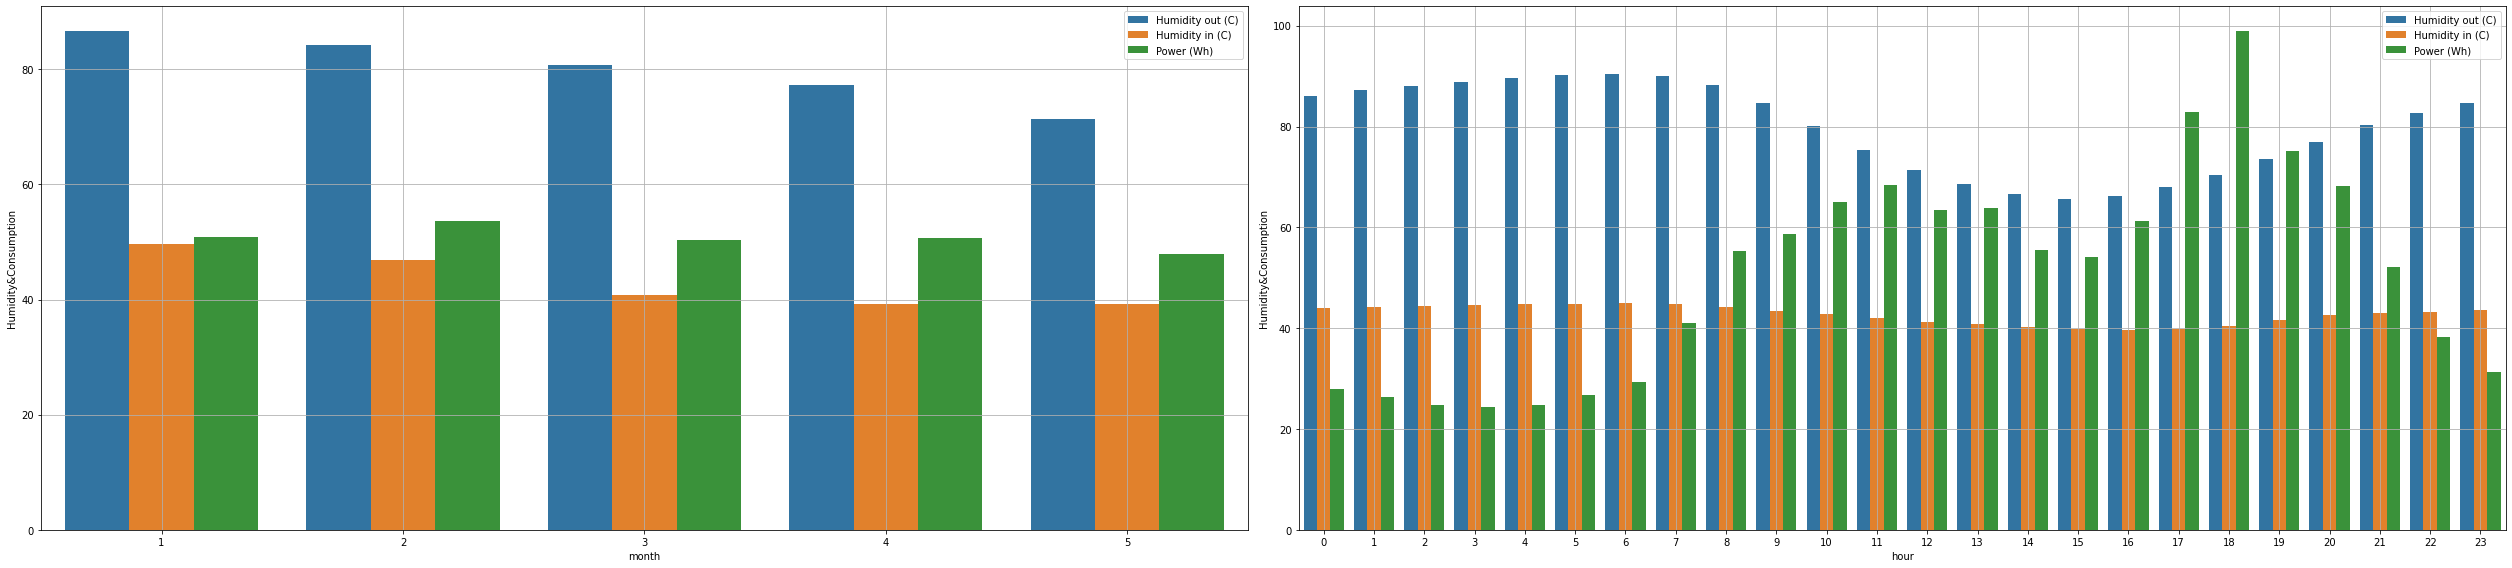

In [155]:
month_hum_in = df_num.groupby("month")["RH_in_avg"].mean()
month_hum_out = df_num.groupby("month")["RH_out"].mean()
df_month = pd.DataFrame({
    'month': month_hum_in.index,
    'Humidity out (C)': month_hum_out,
    'Humidity in (C)': month_hum_in,
    'Power (Wh)': month_power
}, index=month_hum_in.index)
df_month = pd.melt(df_month, id_vars="month",  var_name="", value_name="Humidity&Consumption")

hour_hum_in = df_num.groupby("hour")["RH_in_avg"].mean()
hour_hum_out = df_num.groupby("hour")["RH_out"].mean()
df_hour = pd.DataFrame({
    'hour': hour_hum_in.index,
    'Humidity out (C)': hour_hum_out,
    'Humidity in (C)': hour_hum_in,
    'Power (Wh)': hour_power
}, index=hour_hum_in.index).rename_axis(None)
df_hour.hour = pd.to_numeric(df_hour.hour, errors='coerce')
df_hour.sort_values(by='hour', ascending=True)
df_hour = pd.melt(df_hour, id_vars="hour", var_name="", value_name="Humidity&Consumption")

fig,sub = plt.subplots(1, 2,figsize=(35,8))

data = [('month', df_month), ('hour', df_hour)]
for d, subplot in zip(data, sub.flatten()):
    sns.barplot(x=d[0], y='Humidity&Consumption', ax=subplot, hue='', data=d[1])
    subplot.grid()
fig.tight_layout()

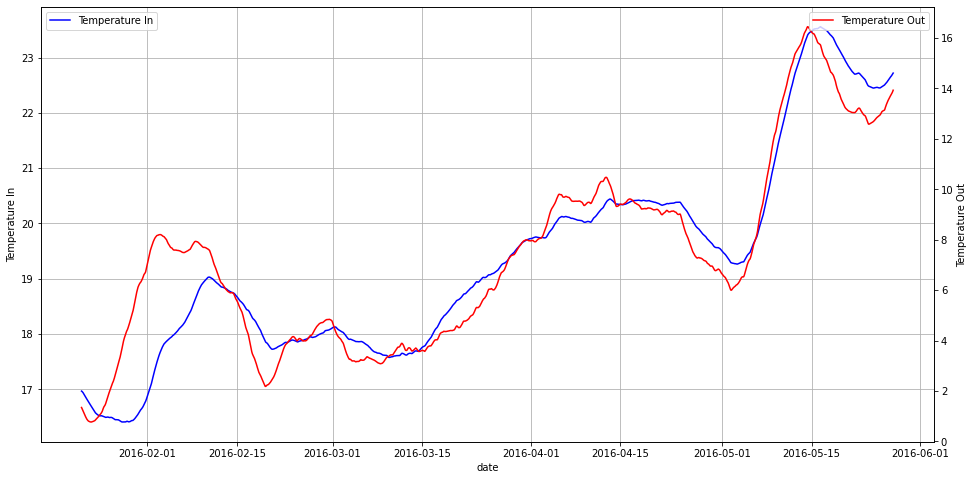

In [165]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = df_num["date"], y = df_num["T_in_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Temperature In").set(ylabel='Temperature In');
sns.lineplot(x = df_num["date"], y = df_num["T_out"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Temperature Out").set(ylabel='Temperature Out');
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

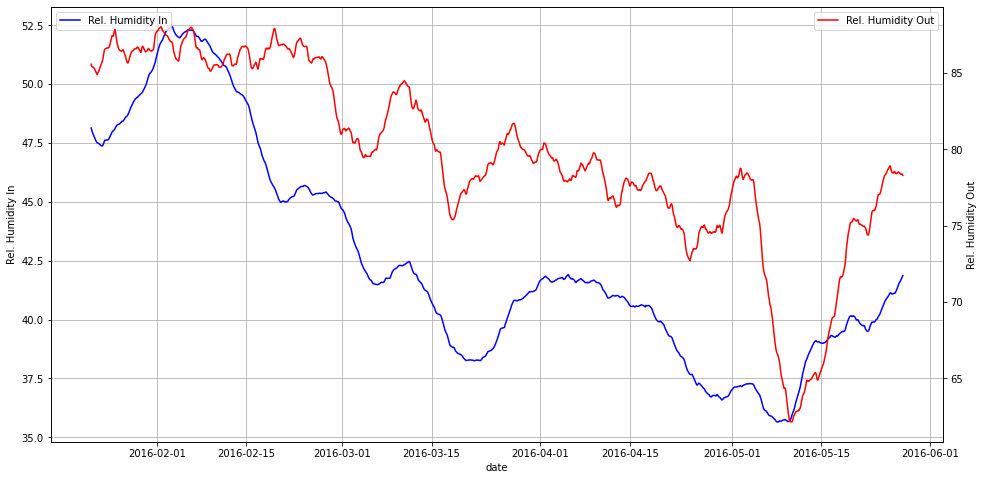

In [166]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = df_num["date"], y = df_num["RH_in_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Rel. Humidity In").set(ylabel='Rel. Humidity In');
sns.lineplot(x = df_num["date"], y = df_num["RH_out"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Rel. Humidity Out").set(ylabel='Rel. Humidity Out');
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [167]:
# PART 2

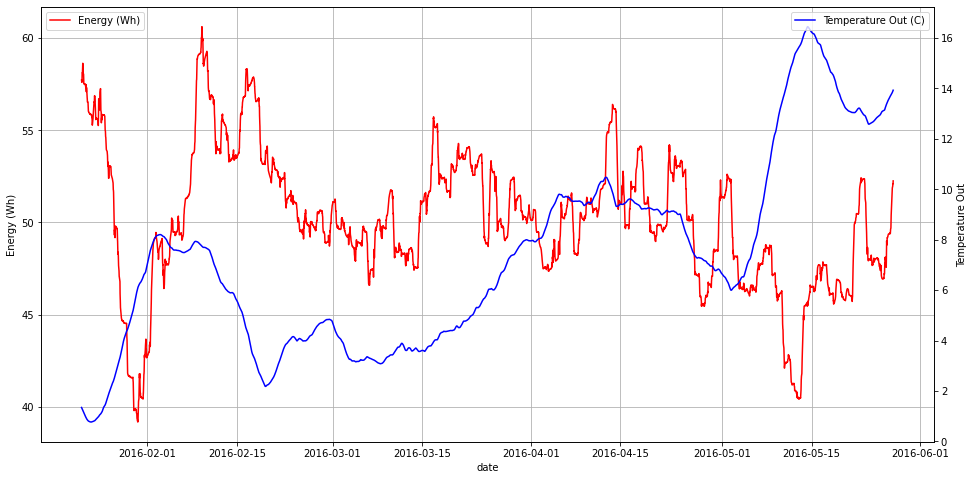

In [173]:
# Understanding the Pattern
# From the above, we can observe that twhen the temperature outside decreases, energy consumption increases due to heater and other appliances.

fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = df_num["date"], y = df_num["energy_avg"].rolling(window=1440).mean(),ax = sub, color="red", label = "Energy (Wh)").set(ylabel='Energy (Wh)');
sns.lineplot(x = df_num["date"], y = df_num["T_out"].rolling(window=1440).mean(),ax = sub2, color="blue", label = "Temperature Out (C)").set(ylabel='Temperature Out');
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [174]:
# Test for Stationarity
# Stationarity is an important concept in time-series and any time-series data should undergo a stationarity test before proceeding with a model.
# We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not which is available in the ‘pmdarima’ package.

from pmdarima.arima import ADFTest

usage_df = df_num[['date', 'energy_avg']]
usage_df.set_index('date', inplace=True)

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(usage_df)

# From the above, we can conclude that the data is non-stationary.
# Hence, we would need to use the “Integrated (I)” concept,
# denoted by value ‘d’ in time series to make the data stationary while building the Auto ARIMA model.

(0.01, False)

In [199]:
# Split Data into Different Test and Train Data Percentage
def get_train_val_test(x):
    r, c = df_num.shape
    last_row = df_num[: int(x*r/100)].iloc[[-1]]
    date = '{}/{}/{}'.format(
        last_row.year.values[0],
        last_row.month.values[0],
        last_row.day.values[0]
    )
    pd_date = pd.to_datetime(date)

    training_data = df_num[df_num.date < pd_date]

    offset = pd_date + pd.DateOffset(1)

    val_mask = (df_num.date >= pd_date) & (df_num.date < offset)
    val_data = df_num.loc[val_mask]

    test_data = df_num[df_num.date >= offset]
    return training_data, val_data, test_data

In [205]:
# Visualisation of the test and train data
def visualise_test_train(training_data, test_data, col):
    fig, sub = plt.subplots(1,1,figsize=(16,8))
    sns.lineplot(x = training_data["date"], y = training_data[col], ax = sub, label = "Train")
    sns.lineplot(x = test_data["date"], y = test_data[col],ax = sub, color="red", label = "Test");
    sub.grid()

In [201]:
# RandomForest

In [202]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [298]:
def apply_random_forest(training_data, val_data, test_data, col):
    
    x_train,y_train = training_data.drop(cols,axis=1), training_data[col]
    x_test,y_test = test_data.drop(cols,axis=1), test_data[col]
    x_val,y_val = val_data.drop(cols,axis=1), val_data[col]

    scaler = StandardScaler()
    rfr  = RandomForestRegressor(random_state=2017,verbose=2,n_jobs=5)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    x_val_scaled = scaler.fit_transform(x_val)

    return rfr, x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled

In [299]:
# ANALYSIS FOR 66% OF DATASET AS TRAIN DATA
rf_train_66, rf_val_66, rf_test_66 = get_train_val_test(66)

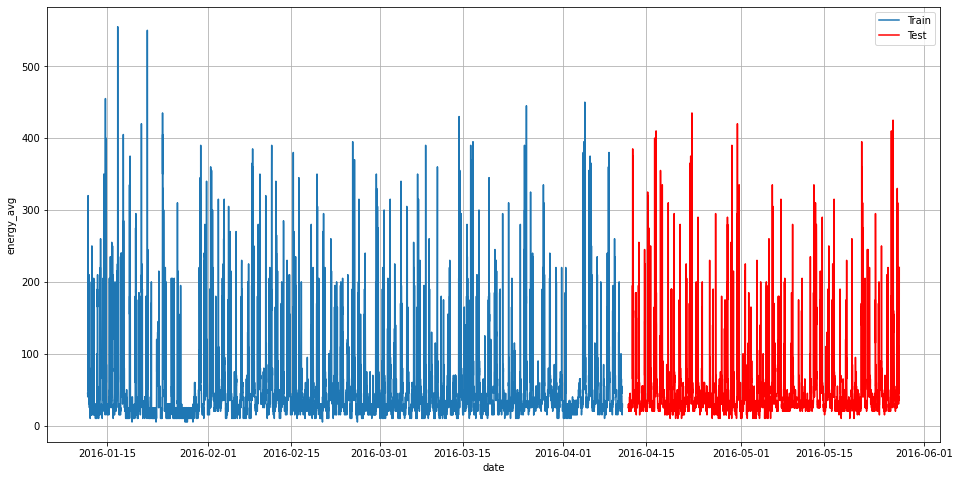

In [300]:
visualise_test_train(rf_train_66, rf_test_66, 'energy_avg')

In [301]:
col = 'energy_avg'
rfr_en, x_train66_en,y_train66_en,x_test66_en,y_test66_en,x_val66_en,y_val66_en,x_train_scaled66_en,x_test_scaled66_en,x_val_scaled66_en =\
apply_random_forest(rf_train_66, rf_val_66, rf_test_66, col)
rfr_en.fit(x_train_scaled66_en, y_train66_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

In [302]:
rfr_en.score(x_val_scaled66_en, y_val66_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


-0.9224729562131806

In [303]:
rfr_en.score(x_test_scaled66_en,y_test66_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


0.973503427667124

In [304]:
rf_test_66["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_test_scaled66_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-304-d9364b49f5b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_test_66["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_test_scaled66_en)


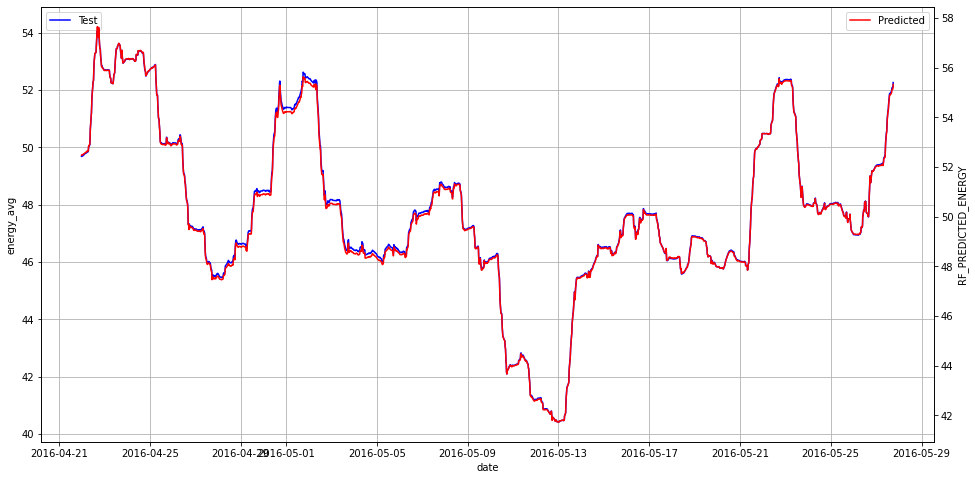

In [305]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_test_66["date"], y = rf_test_66["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_test_66["date"], y = rf_test_66["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [306]:
rf_val_66["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled66_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-306-343d0a1ea297>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_val_66["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled66_en)


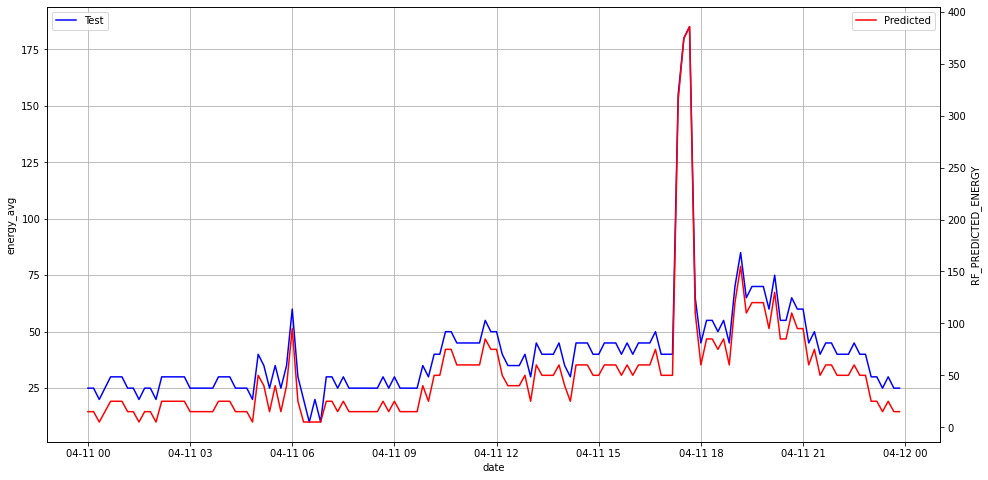

In [307]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_val_66["date"], y = rf_val_66["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_val_66["date"], y = rf_val_66["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [308]:
from math import sqrt
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(rf_test_66.energy_avg, rf_test_66.RF_PREDICTED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(rf_val_66.energy_avg, rf_val_66.RF_PREDICTED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(rf_test_66.energy_avg, rf_test_66.RF_PREDICTED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(rf_val_66.energy_avg, rf_val_66.RF_PREDICTED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(rf_test_66.energy_avg, rf_test_66.RF_PREDICTED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(rf_val_66.energy_avg, rf_val_66.RF_PREDICTED_ENERGY))

RMSE FOR TESTDATA 7.693490117014776
RMSE FOR SINGLE TEST HORIZON 32.8094310734141
MAE FOR TESTDATA 2.81518439823949
MAE FOR SINGLE TEST HORIZON 18.334375
MAPE FOR TESTDATA 0.029008462569075702
MAPE FOR SINGLE TEST HORIZON 0.3818564530101927


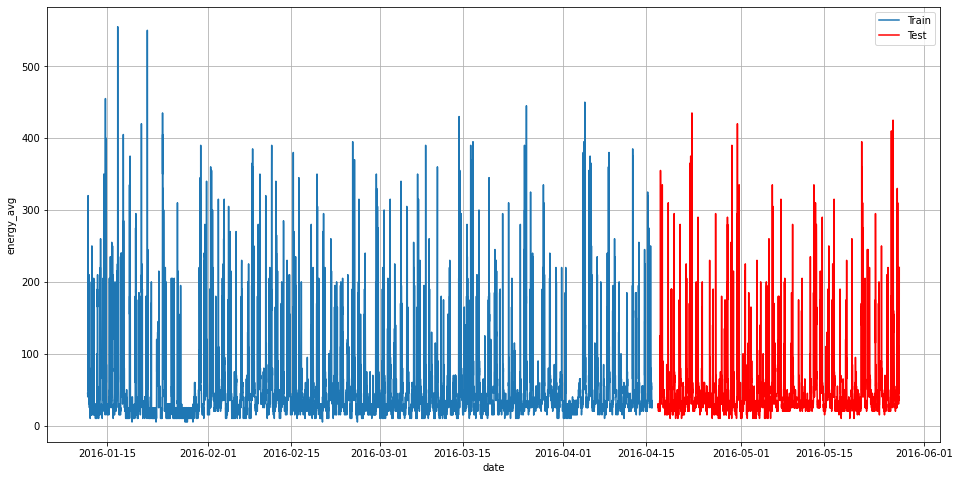

In [309]:
# ANALYSIS FOR 70% OF DATASET AS TRAIN DATA
rf_train_70, rf_val_70, rf_test_70 = get_train_val_test(70)
visualise_test_train(rf_train_70, rf_test_70, 'energy_avg')

In [310]:
col = 'energy_avg'
rfr_en, x_train70_en,y_train70_en,x_test70_en,y_test70_en,x_val70_en,y_val70_en,x_train_scaled70_en,x_test_scaled70_en,x_val_scaled70_en =\
apply_random_forest(rf_train_70, rf_val_70, rf_test_70, col)
rfr_en.fit(x_train_scaled70_en,y_train70_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.2s


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100building tree 8 of 100

building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-311-fef728c69d6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_test_70["RF_PREDICTED_ENERGY"] = rfr_e

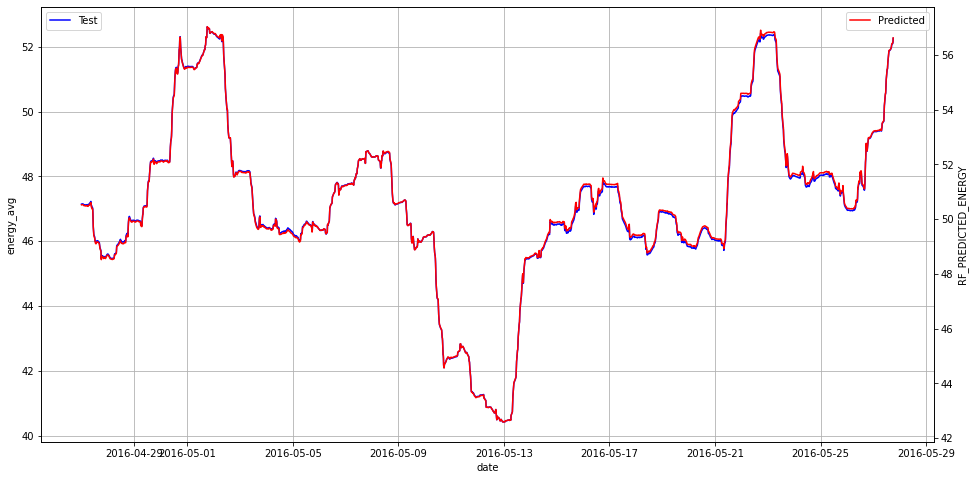

In [311]:
rfr_en.score(x_val_scaled70_en,y_val70_en)
rfr_en.score(x_test_scaled70_en,y_test70_en)
rf_test_70["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_test_scaled70_en)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_test_70["date"], y = rf_test_70["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_test_70["date"], y = rf_test_70["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-312-035e8b493386>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_val_70["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled70_en)


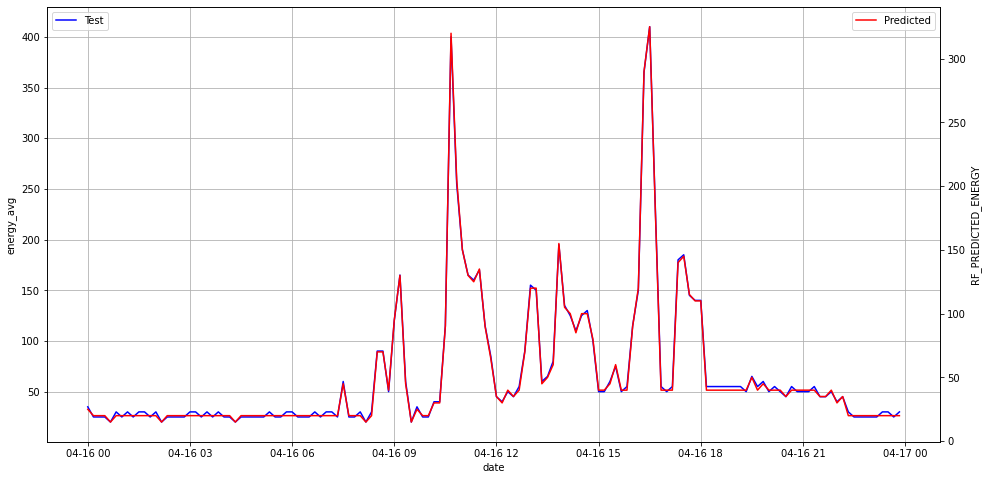

In [312]:
rf_val_70["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled70_en)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_val_70["date"], y = rf_val_70["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_val_70["date"], y = rf_val_70["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [313]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(rf_test_70.energy_avg, rf_test_70.RF_PREDICTED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(rf_val_70.energy_avg, rf_val_70.RF_PREDICTED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(rf_test_70.energy_avg, rf_test_70.RF_PREDICTED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(rf_val_70.energy_avg, rf_val_70.RF_PREDICTED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(rf_test_70.energy_avg, rf_test_70.RF_PREDICTED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(rf_val_70.energy_avg, rf_val_70.RF_PREDICTED_ENERGY))

RMSE FOR TESTDATA 9.416018184428083
RMSE FOR SINGLE TEST HORIZON 20.525224149540705
MAE FOR TESTDATA 3.8495399556994383
MAE FOR SINGLE TEST HORIZON 15.209027777777777
MAPE FOR TESTDATA 0.04522286870918302
MAPE FOR SINGLE TEST HORIZON 0.2377827439766675


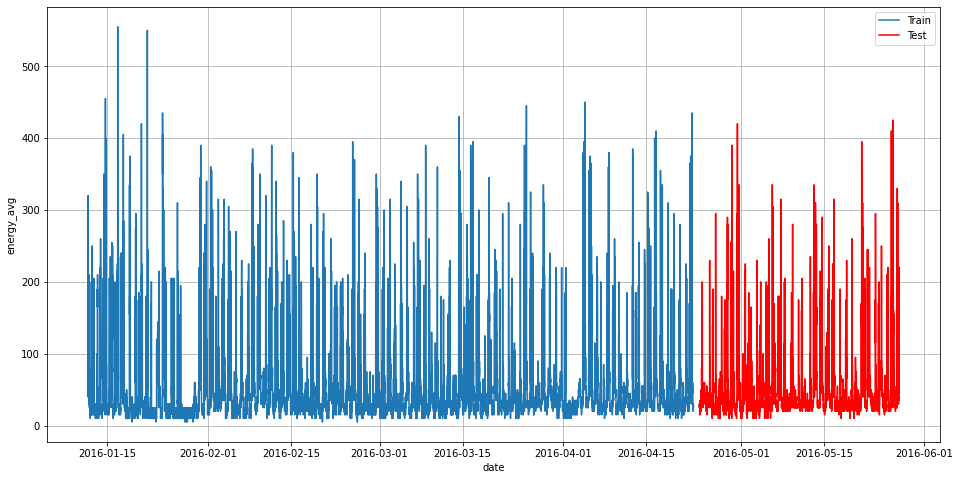

In [314]:
# ANALYSIS FOR 75% OF DATASET AS TRAIN DATA
rf_train_75, rf_val_75, rf_test_75 = get_train_val_test(75)
visualise_test_train(rf_train_75, rf_test_75, 'energy_avg')

In [315]:
col = 'energy_avg'
rfr_en, x_train75_en,y_train75_en,x_test75_en,y_test75_en,x_val75_en,y_val75_en,x_train_scaled75_en,x_test_scaled75_en,x_val_scaled75_en =\
apply_random_forest(rf_train_75, rf_val_75, rf_test_75, col)
rfr_en.fit(x_train_scaled75_en,y_train75_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.2s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100building tree 13 of 100

building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-316-2a4629fadc8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_test_75["RF_PREDICTED_ENERGY"] = rfr_e

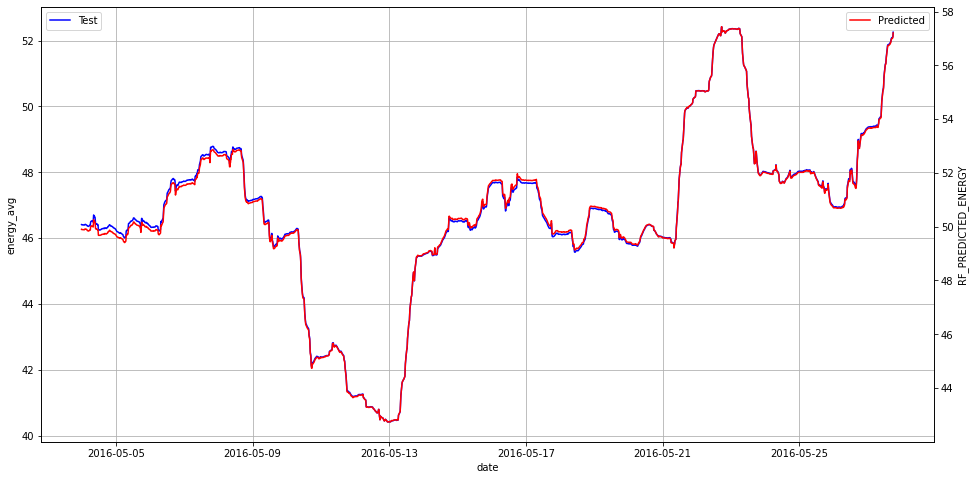

In [316]:
rfr_en.score(x_val_scaled75_en,y_val75_en)
rfr_en.score(x_test_scaled75_en,y_test75_en)
rf_test_75["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_test_scaled75_en)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_test_75["date"], y = rf_test_75["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_test_75["date"], y = rf_test_75["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-317-4124949025fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_val_75["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled75_en)


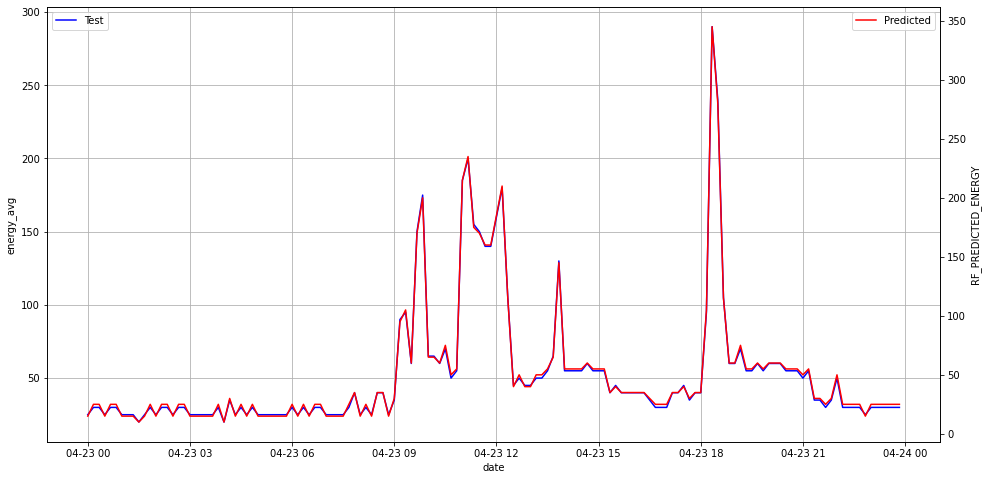

In [317]:
rf_val_75["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled75_en)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_val_75["date"], y = rf_val_75["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_val_75["date"], y = rf_val_75["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [318]:

print('RMSE FOR TESTDATA', sqrt(mean_squared_error(rf_test_75.energy_avg, rf_test_75.RF_PREDICTED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(rf_val_75.energy_avg, rf_val_75.RF_PREDICTED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(rf_test_75.energy_avg, rf_test_75.RF_PREDICTED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(rf_val_75.energy_avg, rf_val_75.RF_PREDICTED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(rf_test_75.energy_avg, rf_test_75.RF_PREDICTED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(rf_val_75.energy_avg, rf_val_75.RF_PREDICTED_ENERGY))

RMSE FOR TESTDATA 10.940312080091328
RMSE FOR SINGLE TEST HORIZON 10.649237877008435
MAE FOR TESTDATA 4.567198107385312
MAE FOR SINGLE TEST HORIZON 7.118402777777778
MAPE FOR TESTDATA 0.05981428499689311
MAPE FOR SINGLE TEST HORIZON 0.16992730655525604


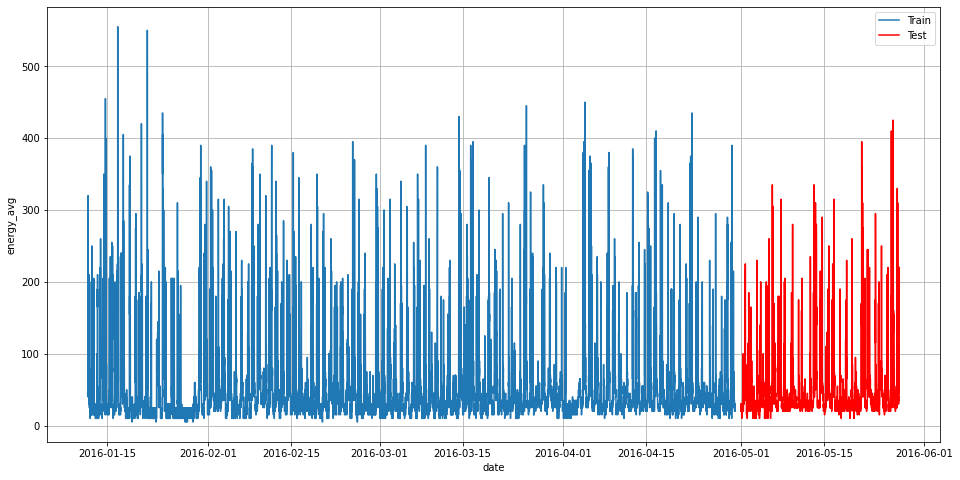

In [319]:
# ANALYSIS FOR 80% OF DATASET AS TRAIN DATA
rf_train_80, rf_val_80, rf_test_80 = get_train_val_test(80)
visualise_test_train(rf_train_80, rf_test_80, 'energy_avg')


In [320]:
col = 'energy_avg'
rfr_en, x_train80_en,y_train80_en,x_test80_en,y_test80_en,x_val80_en,y_val80_en,x_train_scaled80_en,x_test_scaled80_en,x_val_scaled80_en =\
apply_random_forest(rf_train_80, rf_val_80, rf_test_80, col)
rfr_en.fit(x_train_scaled80_en,y_train80_en)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.2s


building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100
building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100building tree 17 of 100

building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomForestRegressor(n_jobs=5, random_state=2017, verbose=2)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-321-89185a456c79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_test_80["RF_PREDICTED_ENERGY"] = rfr_e

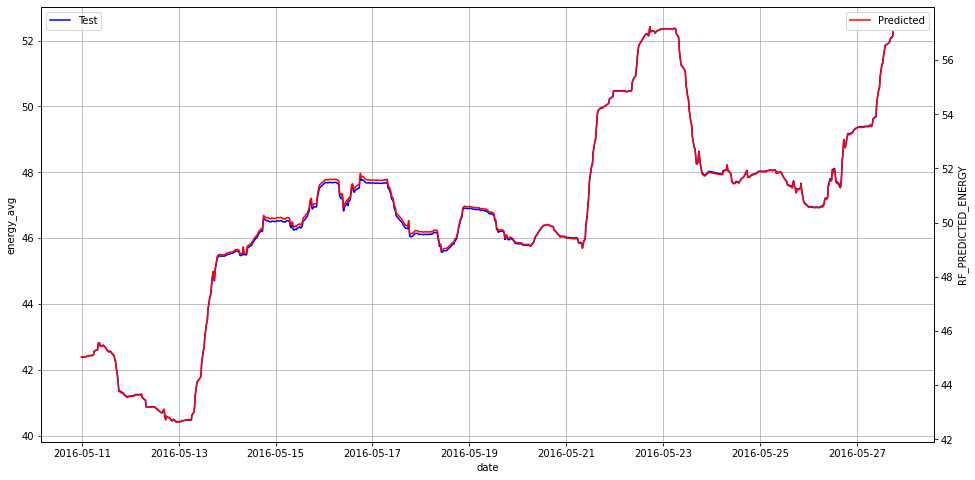

In [321]:
rfr_en.score(x_val_scaled80_en,y_val80_en)
rfr_en.score(x_test_scaled80_en,y_test80_en)
rf_test_80["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_test_scaled80_en)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_test_80["date"], y = rf_test_80["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_test_80["date"], y = rf_test_80["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished
<ipython-input-322-505a3887f34b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_val_80["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled80_en)


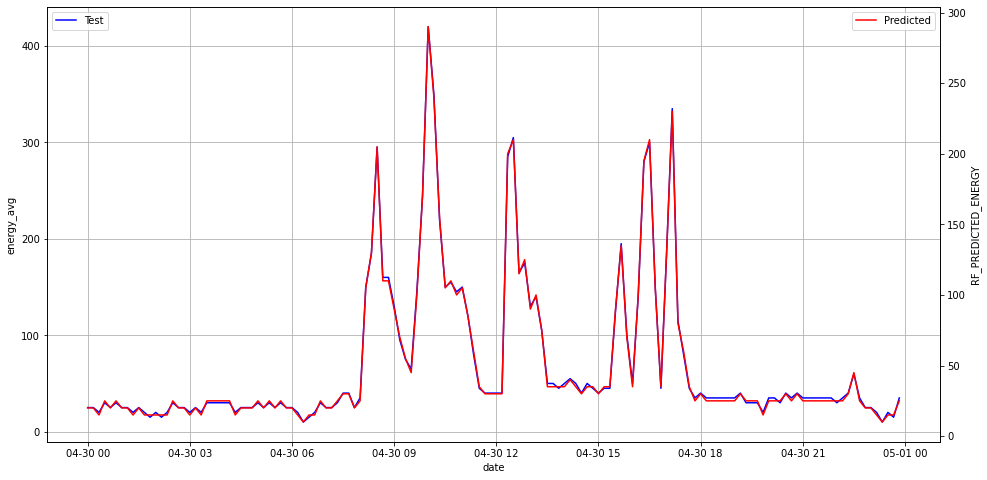

In [322]:
rf_val_80["RF_PREDICTED_ENERGY"] = rfr_en.predict(x_val_scaled80_en)
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = rf_val_80["date"], y = rf_val_80["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = rf_val_80["date"], y = rf_val_80["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [323]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(rf_test_80.energy_avg, rf_test_80.RF_PREDICTED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(rf_val_80.energy_avg, rf_val_80.RF_PREDICTED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(rf_test_80.energy_avg, rf_test_80.RF_PREDICTED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(rf_val_80.energy_avg, rf_val_80.RF_PREDICTED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(rf_test_80.energy_avg, rf_test_80.RF_PREDICTED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(rf_val_80.energy_avg, rf_val_80.RF_PREDICTED_ENERGY))

RMSE FOR TESTDATA 10.543000883790564
RMSE FOR SINGLE TEST HORIZON 31.68584945295858
MAE FOR TESTDATA 4.365377627822475
MAE FOR SINGLE TEST HORIZON 19.618055555555557
MAPE FOR TESTDATA 0.0553046373717533
MAPE FOR SINGLE TEST HORIZON 0.24001991427822478


In [324]:
# LSTM

In [325]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [331]:
def apply_lstm(training_data, val_data, test_data, col):
    model_k = Sequential()
    model_k.add(LSTM(1, input_shape=(1,5)))
    model_k.add(Dense(1))
    model_k.compile(loss='mean_squared_error', optimizer='adam')

    cols = ['year', 'month', 'day', 'hour', 'date', 'Appliances', 'lights']
    x_train,y_train = training_data.drop(cols,axis=1), training_data[col]
    x_test,y_test = test_data.drop(cols,axis=1), test_data[col]
    x_val,y_val = val_data.drop(cols,axis=1), val_data[col]

    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.fit_transform(x_test)
    x_val_scaled = scaler.fit_transform(x_val)

    return model_k, x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled

In [378]:
# ANALYSIS FOR 66% OF DATASET AS TRAIN DATA
col = 'energy_avg'

ls_train_66, ls_val_66, ls_test_66 = get_train_val_test(66)

model_k, x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(ls_train_66, ls_val_66, ls_test_66, col)

x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=1500, batch_size=96, verbose=2)

Epoch 1/1500
136/136 - 2s - loss: 5629.3110 - val_loss: 2177.7188
Epoch 2/1500
136/136 - 0s - loss: 5597.1919 - val_loss: 2153.8325
Epoch 3/1500
136/136 - 0s - loss: 5565.2002 - val_loss: 2130.6489
Epoch 4/1500
136/136 - 0s - loss: 5534.0371 - val_loss: 2108.6606
Epoch 5/1500
136/136 - 0s - loss: 5503.7256 - val_loss: 2087.8237
Epoch 6/1500
136/136 - 0s - loss: 5473.7334 - val_loss: 2067.9543
Epoch 7/1500
136/136 - 0s - loss: 5443.5479 - val_loss: 2048.4778
Epoch 8/1500
136/136 - 0s - loss: 5412.4404 - val_loss: 2028.0734
Epoch 9/1500
136/136 - 0s - loss: 5379.8906 - val_loss: 2004.1300
Epoch 10/1500
136/136 - 0s - loss: 5345.9897 - val_loss: 1975.6016
Epoch 11/1500
136/136 - 0s - loss: 5312.0835 - val_loss: 1947.2378
Epoch 12/1500
136/136 - 0s - loss: 5280.2319 - val_loss: 1921.9266
Epoch 13/1500
136/136 - 0s - loss: 5250.4058 - val_loss: 1898.4030
Epoch 14/1500
136/136 - 0s - loss: 5221.8247 - val_loss: 1875.9221
Epoch 15/1500
136/136 - 0s - loss: 5194.2852 - val_loss: 1854.3672
Epoc

Epoch 124/1500
136/136 - 0s - loss: 3426.7334 - val_loss: 697.3727
Epoch 125/1500
136/136 - 0s - loss: 3415.4468 - val_loss: 691.8325
Epoch 126/1500
136/136 - 0s - loss: 3404.2385 - val_loss: 686.3015
Epoch 127/1500
136/136 - 0s - loss: 3393.0952 - val_loss: 681.2820
Epoch 128/1500
136/136 - 0s - loss: 3382.0051 - val_loss: 675.4745
Epoch 129/1500
136/136 - 0s - loss: 3370.9553 - val_loss: 669.7901
Epoch 130/1500
136/136 - 0s - loss: 3359.9705 - val_loss: 664.6339
Epoch 131/1500
136/136 - 0s - loss: 3349.0552 - val_loss: 658.5112
Epoch 132/1500
136/136 - 0s - loss: 3338.1731 - val_loss: 653.1089
Epoch 133/1500
136/136 - 0s - loss: 3327.3540 - val_loss: 648.2821
Epoch 134/1500
136/136 - 0s - loss: 3316.5562 - val_loss: 642.8139
Epoch 135/1500
136/136 - 0s - loss: 3305.8357 - val_loss: 636.7543
Epoch 136/1500
136/136 - 0s - loss: 3295.1743 - val_loss: 630.8141
Epoch 137/1500
136/136 - 0s - loss: 3284.5276 - val_loss: 625.2568
Epoch 138/1500
136/136 - 0s - loss: 3273.9172 - val_loss: 620.

Epoch 247/1500
136/136 - 0s - loss: 2351.3088 - val_loss: 359.6517
Epoch 248/1500
136/136 - 0s - loss: 2344.4580 - val_loss: 359.3110
Epoch 249/1500
136/136 - 0s - loss: 2337.6494 - val_loss: 357.5738
Epoch 250/1500
136/136 - 0s - loss: 2330.8477 - val_loss: 357.3973
Epoch 251/1500
136/136 - 0s - loss: 2324.0671 - val_loss: 356.7784
Epoch 252/1500
136/136 - 0s - loss: 2317.2883 - val_loss: 357.6667
Epoch 253/1500
136/136 - 0s - loss: 2310.5510 - val_loss: 355.6667
Epoch 254/1500
136/136 - 0s - loss: 2303.8271 - val_loss: 355.0406
Epoch 255/1500
136/136 - 0s - loss: 2297.0979 - val_loss: 354.4104
Epoch 256/1500
136/136 - 0s - loss: 2290.3909 - val_loss: 352.7284
Epoch 257/1500
136/136 - 0s - loss: 2283.7021 - val_loss: 352.2886
Epoch 258/1500
136/136 - 0s - loss: 2277.0371 - val_loss: 353.3153
Epoch 259/1500
136/136 - 0s - loss: 2270.4155 - val_loss: 351.9753
Epoch 260/1500
136/136 - 0s - loss: 2263.7986 - val_loss: 351.2847
Epoch 261/1500
136/136 - 0s - loss: 2257.2161 - val_loss: 351.

Epoch 370/1500
136/136 - 0s - loss: 1642.2172 - val_loss: 346.5387
Epoch 371/1500
136/136 - 0s - loss: 1637.3691 - val_loss: 347.8266
Epoch 372/1500
136/136 - 0s - loss: 1632.5244 - val_loss: 343.4445
Epoch 373/1500
136/136 - 0s - loss: 1627.6924 - val_loss: 344.4348
Epoch 374/1500
136/136 - 0s - loss: 1622.9008 - val_loss: 344.2392
Epoch 375/1500
136/136 - 0s - loss: 1618.1161 - val_loss: 347.3042
Epoch 376/1500
136/136 - 0s - loss: 1613.3660 - val_loss: 342.3450
Epoch 377/1500
136/136 - 0s - loss: 1608.6201 - val_loss: 346.3737
Epoch 378/1500
136/136 - 0s - loss: 1603.8967 - val_loss: 347.5385
Epoch 379/1500
136/136 - 0s - loss: 1599.1729 - val_loss: 345.8738
Epoch 380/1500
136/136 - 0s - loss: 1594.4469 - val_loss: 348.4134
Epoch 381/1500
136/136 - 0s - loss: 1589.7399 - val_loss: 349.1849
Epoch 382/1500
136/136 - 0s - loss: 1585.0468 - val_loss: 351.9268
Epoch 383/1500
136/136 - 0s - loss: 1580.3719 - val_loss: 348.6378
Epoch 384/1500
136/136 - 0s - loss: 1575.7269 - val_loss: 345.

Epoch 493/1500
136/136 - 0s - loss: 1137.6362 - val_loss: 393.1626
Epoch 494/1500
136/136 - 0s - loss: 1134.2207 - val_loss: 386.4787
Epoch 495/1500
136/136 - 0s - loss: 1130.7965 - val_loss: 383.9432
Epoch 496/1500
136/136 - 0s - loss: 1127.4159 - val_loss: 390.3447
Epoch 497/1500
136/136 - 0s - loss: 1124.0344 - val_loss: 393.7018
Epoch 498/1500
136/136 - 0s - loss: 1120.6831 - val_loss: 394.5752
Epoch 499/1500
136/136 - 0s - loss: 1117.3506 - val_loss: 393.6632
Epoch 500/1500
136/136 - 0s - loss: 1114.0171 - val_loss: 388.2631
Epoch 501/1500
136/136 - 0s - loss: 1110.6899 - val_loss: 391.4674
Epoch 502/1500
136/136 - 0s - loss: 1107.3723 - val_loss: 393.4635
Epoch 503/1500
136/136 - 0s - loss: 1104.0743 - val_loss: 395.9768
Epoch 504/1500
136/136 - 0s - loss: 1100.7742 - val_loss: 394.5135
Epoch 505/1500
136/136 - 0s - loss: 1097.4633 - val_loss: 399.8737
Epoch 506/1500
136/136 - 0s - loss: 1094.1560 - val_loss: 390.8257
Epoch 507/1500
136/136 - 0s - loss: 1090.8911 - val_loss: 396.

Epoch 617/1500
136/136 - 0s - loss: 787.8986 - val_loss: 426.2819
Epoch 618/1500
136/136 - 0s - loss: 785.6122 - val_loss: 436.3121
Epoch 619/1500
136/136 - 0s - loss: 783.3691 - val_loss: 438.3837
Epoch 620/1500
136/136 - 0s - loss: 781.1068 - val_loss: 432.7873
Epoch 621/1500
136/136 - 0s - loss: 778.8676 - val_loss: 428.1182
Epoch 622/1500
136/136 - 0s - loss: 776.6266 - val_loss: 439.0137
Epoch 623/1500
136/136 - 0s - loss: 774.4134 - val_loss: 433.8995
Epoch 624/1500
136/136 - 0s - loss: 772.1933 - val_loss: 439.4252
Epoch 625/1500
136/136 - 0s - loss: 769.9841 - val_loss: 434.8606
Epoch 626/1500
136/136 - 0s - loss: 767.7654 - val_loss: 429.4590
Epoch 627/1500
136/136 - 0s - loss: 765.6043 - val_loss: 439.5381
Epoch 628/1500
136/136 - 0s - loss: 763.4487 - val_loss: 436.5760
Epoch 629/1500
136/136 - 0s - loss: 761.2844 - val_loss: 439.1578
Epoch 630/1500
136/136 - 0s - loss: 759.1020 - val_loss: 433.1057
Epoch 631/1500
136/136 - 0s - loss: 756.9427 - val_loss: 430.4554
Epoch 632/

136/136 - 0s - loss: 561.8725 - val_loss: 420.4578
Epoch 742/1500
136/136 - 0s - loss: 560.4415 - val_loss: 422.8323
Epoch 743/1500
136/136 - 0s - loss: 559.0544 - val_loss: 418.8584
Epoch 744/1500
136/136 - 0s - loss: 557.6161 - val_loss: 418.2065
Epoch 745/1500
136/136 - 0s - loss: 556.1830 - val_loss: 423.0938
Epoch 746/1500
136/136 - 0s - loss: 554.8356 - val_loss: 419.3722
Epoch 747/1500
136/136 - 0s - loss: 553.4053 - val_loss: 419.9414
Epoch 748/1500
136/136 - 0s - loss: 552.0345 - val_loss: 429.6676
Epoch 749/1500
136/136 - 0s - loss: 550.6210 - val_loss: 410.2975
Epoch 750/1500
136/136 - 0s - loss: 549.2769 - val_loss: 423.1823
Epoch 751/1500
136/136 - 0s - loss: 547.8962 - val_loss: 418.0925
Epoch 752/1500
136/136 - 0s - loss: 546.4799 - val_loss: 417.4911
Epoch 753/1500
136/136 - 0s - loss: 545.1924 - val_loss: 420.3344
Epoch 754/1500
136/136 - 0s - loss: 543.8104 - val_loss: 409.3209
Epoch 755/1500
136/136 - 0s - loss: 542.4655 - val_loss: 424.9389
Epoch 756/1500
136/136 - 

Epoch 866/1500
136/136 - 0s - loss: 418.7442 - val_loss: 382.1686
Epoch 867/1500
136/136 - 0s - loss: 417.8330 - val_loss: 379.0038
Epoch 868/1500
136/136 - 0s - loss: 416.9800 - val_loss: 375.1806
Epoch 869/1500
136/136 - 0s - loss: 416.0321 - val_loss: 369.2611
Epoch 870/1500
136/136 - 0s - loss: 415.0934 - val_loss: 375.3995
Epoch 871/1500
136/136 - 0s - loss: 414.2044 - val_loss: 374.2088
Epoch 872/1500
136/136 - 0s - loss: 413.2983 - val_loss: 379.2900
Epoch 873/1500
136/136 - 0s - loss: 412.3467 - val_loss: 364.8135
Epoch 874/1500
136/136 - 0s - loss: 411.4743 - val_loss: 379.5384
Epoch 875/1500
136/136 - 0s - loss: 410.6245 - val_loss: 370.6239
Epoch 876/1500
136/136 - 0s - loss: 409.6985 - val_loss: 380.3182
Epoch 877/1500
136/136 - 0s - loss: 408.8285 - val_loss: 383.0136
Epoch 878/1500
136/136 - 0s - loss: 407.9821 - val_loss: 374.3807
Epoch 879/1500
136/136 - 0s - loss: 407.0707 - val_loss: 370.5394
Epoch 880/1500
136/136 - 0s - loss: 406.1515 - val_loss: 355.5752
Epoch 881/

136/136 - 0s - loss: 323.4029 - val_loss: 336.5302
Epoch 991/1500
136/136 - 0s - loss: 322.7004 - val_loss: 341.9268
Epoch 992/1500
136/136 - 0s - loss: 322.0866 - val_loss: 352.2828
Epoch 993/1500
136/136 - 0s - loss: 321.4750 - val_loss: 335.8929
Epoch 994/1500
136/136 - 0s - loss: 320.7333 - val_loss: 333.8450
Epoch 995/1500
136/136 - 0s - loss: 320.1870 - val_loss: 355.2482
Epoch 996/1500
136/136 - 0s - loss: 319.4934 - val_loss: 355.6435
Epoch 997/1500
136/136 - 0s - loss: 318.8591 - val_loss: 349.5973
Epoch 998/1500
136/136 - 0s - loss: 318.1375 - val_loss: 362.2610
Epoch 999/1500
136/136 - 0s - loss: 317.6602 - val_loss: 348.5144
Epoch 1000/1500
136/136 - 0s - loss: 317.0104 - val_loss: 335.5378
Epoch 1001/1500
136/136 - 0s - loss: 316.4524 - val_loss: 348.4618
Epoch 1002/1500
136/136 - 0s - loss: 315.6714 - val_loss: 352.7523
Epoch 1003/1500
136/136 - 0s - loss: 315.0936 - val_loss: 344.5600
Epoch 1004/1500
136/136 - 0s - loss: 314.4333 - val_loss: 347.4016
Epoch 1005/1500
136/

Epoch 1113/1500
136/136 - 0s - loss: 254.7367 - val_loss: 337.3673
Epoch 1114/1500
136/136 - 0s - loss: 254.2606 - val_loss: 335.6950
Epoch 1115/1500
136/136 - 0s - loss: 253.7462 - val_loss: 334.6747
Epoch 1116/1500
136/136 - 0s - loss: 253.3831 - val_loss: 349.5596
Epoch 1117/1500
136/136 - 0s - loss: 252.8821 - val_loss: 335.9240
Epoch 1118/1500
136/136 - 0s - loss: 252.3833 - val_loss: 333.5623
Epoch 1119/1500
136/136 - 0s - loss: 251.8872 - val_loss: 337.9720
Epoch 1120/1500
136/136 - 0s - loss: 251.4303 - val_loss: 333.7284
Epoch 1121/1500
136/136 - 0s - loss: 250.9645 - val_loss: 333.5989
Epoch 1122/1500
136/136 - 0s - loss: 250.4513 - val_loss: 343.0751
Epoch 1123/1500
136/136 - 0s - loss: 250.0685 - val_loss: 353.2773
Epoch 1124/1500
136/136 - 0s - loss: 249.5515 - val_loss: 352.9391
Epoch 1125/1500
136/136 - 0s - loss: 249.1294 - val_loss: 350.5760
Epoch 1126/1500
136/136 - 0s - loss: 248.6360 - val_loss: 351.1086
Epoch 1127/1500
136/136 - 0s - loss: 248.2513 - val_loss: 341.

Epoch 1236/1500
136/136 - 0s - loss: 203.4395 - val_loss: 358.1262
Epoch 1237/1500
136/136 - 0s - loss: 203.1568 - val_loss: 351.2729
Epoch 1238/1500
136/136 - 0s - loss: 202.6951 - val_loss: 363.7191
Epoch 1239/1500
136/136 - 0s - loss: 202.2570 - val_loss: 366.8730
Epoch 1240/1500
136/136 - 0s - loss: 201.8649 - val_loss: 365.5259
Epoch 1241/1500
136/136 - 0s - loss: 201.5117 - val_loss: 355.3939
Epoch 1242/1500
136/136 - 0s - loss: 201.1862 - val_loss: 351.2108
Epoch 1243/1500
136/136 - 0s - loss: 200.8268 - val_loss: 354.1853
Epoch 1244/1500
136/136 - 0s - loss: 200.5174 - val_loss: 363.0197
Epoch 1245/1500
136/136 - 0s - loss: 200.1196 - val_loss: 359.6453
Epoch 1246/1500
136/136 - 0s - loss: 199.7796 - val_loss: 363.4603
Epoch 1247/1500
136/136 - 0s - loss: 199.4964 - val_loss: 347.3543
Epoch 1248/1500
136/136 - 0s - loss: 199.0330 - val_loss: 365.4660
Epoch 1249/1500
136/136 - 0s - loss: 198.6893 - val_loss: 364.9185
Epoch 1250/1500
136/136 - 0s - loss: 198.3381 - val_loss: 342.

Epoch 1359/1500
136/136 - 0s - loss: 164.1083 - val_loss: 373.0110
Epoch 1360/1500
136/136 - 0s - loss: 163.9057 - val_loss: 389.2672
Epoch 1361/1500
136/136 - 0s - loss: 163.6161 - val_loss: 383.6530
Epoch 1362/1500
136/136 - 0s - loss: 163.2884 - val_loss: 397.2644
Epoch 1363/1500
136/136 - 0s - loss: 163.1595 - val_loss: 382.3201
Epoch 1364/1500
136/136 - 0s - loss: 162.8829 - val_loss: 377.7119
Epoch 1365/1500
136/136 - 0s - loss: 162.5530 - val_loss: 400.4862
Epoch 1366/1500
136/136 - 0s - loss: 162.2504 - val_loss: 391.0894
Epoch 1367/1500
136/136 - 0s - loss: 161.9516 - val_loss: 379.6080
Epoch 1368/1500
136/136 - 0s - loss: 161.7421 - val_loss: 373.1491
Epoch 1369/1500
136/136 - 0s - loss: 161.4026 - val_loss: 383.1064
Epoch 1370/1500
136/136 - 0s - loss: 161.2191 - val_loss: 394.0653
Epoch 1371/1500
136/136 - 0s - loss: 160.8769 - val_loss: 391.5311
Epoch 1372/1500
136/136 - 0s - loss: 160.6185 - val_loss: 392.9501
Epoch 1373/1500
136/136 - 0s - loss: 160.4075 - val_loss: 398.

Epoch 1482/1500
136/136 - 0s - loss: 134.1872 - val_loss: 424.4315
Epoch 1483/1500
136/136 - 0s - loss: 134.0222 - val_loss: 422.0282
Epoch 1484/1500
136/136 - 0s - loss: 133.7752 - val_loss: 412.8148
Epoch 1485/1500
136/136 - 0s - loss: 133.5518 - val_loss: 398.2427
Epoch 1486/1500
136/136 - 0s - loss: 133.4255 - val_loss: 404.9864
Epoch 1487/1500
136/136 - 0s - loss: 133.1679 - val_loss: 405.4537
Epoch 1488/1500
136/136 - 0s - loss: 132.8539 - val_loss: 419.2854
Epoch 1489/1500
136/136 - 0s - loss: 132.7248 - val_loss: 412.7928
Epoch 1490/1500
136/136 - 0s - loss: 132.4625 - val_loss: 408.4606
Epoch 1491/1500
136/136 - 0s - loss: 132.2525 - val_loss: 409.5724
Epoch 1492/1500
136/136 - 0s - loss: 132.0691 - val_loss: 425.8618
Epoch 1493/1500
136/136 - 0s - loss: 131.8617 - val_loss: 434.4125
Epoch 1494/1500
136/136 - 0s - loss: 131.6967 - val_loss: 420.6871
Epoch 1495/1500
136/136 - 0s - loss: 131.4985 - val_loss: 414.3784
Epoch 1496/1500
136/136 - 0s - loss: 131.3429 - val_loss: 405.

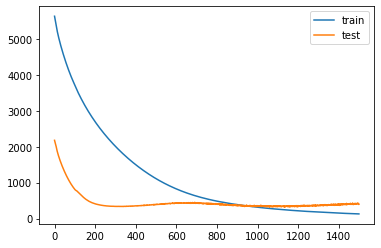

In [379]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [380]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
ls_test_66["DL_PRED_ENERGY"] = res

<ipython-input-380-d48670af2e47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_test_66["DL_PRED_ENERGY"] = res


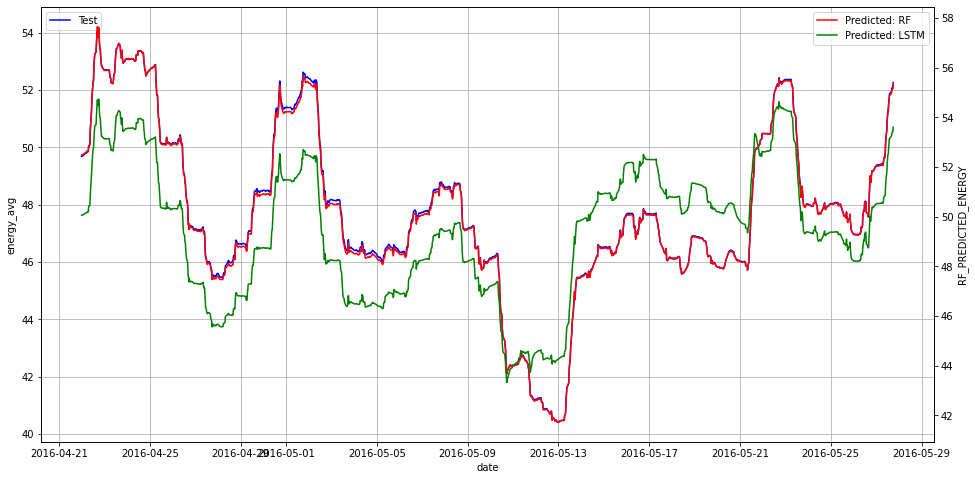

In [381]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_test_66["date"], y = ls_test_66["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_test_66["date"], y = rf_test_66["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_test_66["date"], y = ls_test_66["DL_PRED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [382]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
ls_val_66["DL_PRED_ENERGY"] = res

<ipython-input-382-022b2cbfefed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_val_66["DL_PRED_ENERGY"] = res


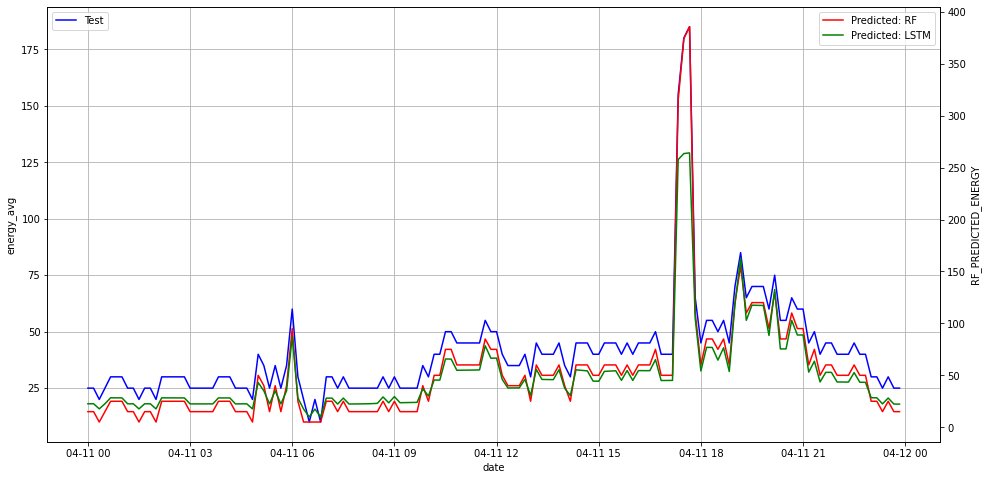

In [386]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_val_66["date"], y = ls_val_66["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_val_66["date"], y = rf_val_66["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_val_66["date"], y = ls_val_66["DL_PRED_ENERGY"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [384]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(ls_test_66.energy_avg, ls_test_66.DL_PRED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(ls_val_66.energy_avg, ls_val_66.DL_PRED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(ls_test_66.energy_avg, ls_test_66.DL_PRED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(ls_val_66.energy_avg, ls_val_66.DL_PRED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(ls_test_66.energy_avg, ls_test_66.DL_PRED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(ls_val_66.energy_avg, ls_val_66.DL_PRED_ENERGY))

RMSE FOR TESTDATA 11.324256322050255
RMSE FOR SINGLE TEST HORIZON 19.93580981367313
MAE FOR TESTDATA 5.064014620657194
MAE FOR SINGLE TEST HORIZON 10.466377894083658
MAPE FOR TESTDATA 0.09445421274837282
MAPE FOR SINGLE TEST HORIZON 0.1846471450742365


In [385]:
# ANALYSIS FOR 70% OF DATASET AS TRAIN DATA
col = 'energy_avg'

ls_train_70, ls_val_70, ls_test_70 = get_train_val_test(70)

model_k, x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(ls_train_70, ls_val_70, ls_test_70, col)

x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=1500, batch_size=96, verbose=2)

Epoch 1/1500
143/143 - 2s - loss: 5625.4600 - val_loss: 9098.5020
Epoch 2/1500
143/143 - 0s - loss: 5606.7681 - val_loss: 9071.8154
Epoch 3/1500
143/143 - 0s - loss: 5582.0322 - val_loss: 9039.0625
Epoch 4/1500
143/143 - 0s - loss: 5555.6265 - val_loss: 9004.1855
Epoch 5/1500
143/143 - 0s - loss: 5528.4355 - val_loss: 8968.2363
Epoch 6/1500
143/143 - 0s - loss: 5499.3667 - val_loss: 8930.6133
Epoch 7/1500
143/143 - 0s - loss: 5467.8418 - val_loss: 8885.2393
Epoch 8/1500
143/143 - 0s - loss: 5434.2744 - val_loss: 8837.0830
Epoch 9/1500
143/143 - 0s - loss: 5402.0220 - val_loss: 8795.3193
Epoch 10/1500
143/143 - 0s - loss: 5372.1313 - val_loss: 8756.6992
Epoch 11/1500
143/143 - 0s - loss: 5343.4624 - val_loss: 8719.3369
Epoch 12/1500
143/143 - 0s - loss: 5315.6211 - val_loss: 8682.9717
Epoch 13/1500
143/143 - 0s - loss: 5288.4526 - val_loss: 8647.5488
Epoch 14/1500
143/143 - 0s - loss: 5261.9102 - val_loss: 8612.5537
Epoch 15/1500
143/143 - 0s - loss: 5235.8770 - val_loss: 8578.4033
Epoc

143/143 - 0s - loss: 3401.8052 - val_loss: 5994.1265
Epoch 124/1500
143/143 - 0s - loss: 3389.9670 - val_loss: 5976.4751
Epoch 125/1500
143/143 - 0s - loss: 3378.2104 - val_loss: 5959.5981
Epoch 126/1500
143/143 - 0s - loss: 3366.5249 - val_loss: 5941.7559
Epoch 127/1500
143/143 - 0s - loss: 3354.9048 - val_loss: 5924.6924
Epoch 128/1500
143/143 - 0s - loss: 3343.3555 - val_loss: 5908.3418
Epoch 129/1500
143/143 - 0s - loss: 3331.8770 - val_loss: 5890.8184
Epoch 130/1500
143/143 - 0s - loss: 3320.4507 - val_loss: 5872.5234
Epoch 131/1500
143/143 - 0s - loss: 3309.1040 - val_loss: 5856.0654
Epoch 132/1500
143/143 - 0s - loss: 3297.8137 - val_loss: 5839.7661
Epoch 133/1500
143/143 - 0s - loss: 3286.5803 - val_loss: 5822.2305
Epoch 134/1500
143/143 - 0s - loss: 3275.3945 - val_loss: 5805.2246
Epoch 135/1500
143/143 - 0s - loss: 3264.2654 - val_loss: 5788.3579
Epoch 136/1500
143/143 - 0s - loss: 3253.1841 - val_loss: 5770.7666
Epoch 137/1500
143/143 - 0s - loss: 3242.1611 - val_loss: 5753.

Epoch 244/1500
143/143 - 0s - loss: 2305.5920 - val_loss: 4249.3730
Epoch 245/1500
143/143 - 0s - loss: 2298.5234 - val_loss: 4236.9888
Epoch 246/1500
143/143 - 0s - loss: 2291.4731 - val_loss: 4225.9053
Epoch 247/1500
143/143 - 0s - loss: 2284.4321 - val_loss: 4215.2661
Epoch 248/1500
143/143 - 0s - loss: 2277.4353 - val_loss: 4203.0835
Epoch 249/1500
143/143 - 0s - loss: 2270.4551 - val_loss: 4190.9497
Epoch 250/1500
143/143 - 0s - loss: 2263.4961 - val_loss: 4180.3066
Epoch 251/1500
143/143 - 0s - loss: 2256.5728 - val_loss: 4168.6465
Epoch 252/1500
143/143 - 0s - loss: 2249.6753 - val_loss: 4157.2441
Epoch 253/1500
143/143 - 0s - loss: 2242.7988 - val_loss: 4145.5156
Epoch 254/1500
143/143 - 0s - loss: 2235.9443 - val_loss: 4136.5244
Epoch 255/1500
143/143 - 0s - loss: 2229.1184 - val_loss: 4123.3628
Epoch 256/1500
143/143 - 0s - loss: 2222.3049 - val_loss: 4113.4395
Epoch 257/1500
143/143 - 0s - loss: 2215.5259 - val_loss: 4101.9980
Epoch 258/1500
143/143 - 0s - loss: 2208.7527 - 

Epoch 365/1500
143/143 - 0s - loss: 1589.5704 - val_loss: 3071.0022
Epoch 366/1500
143/143 - 0s - loss: 1584.6237 - val_loss: 3063.9248
Epoch 367/1500
143/143 - 0s - loss: 1579.6921 - val_loss: 3057.4507
Epoch 368/1500
143/143 - 0s - loss: 1574.7864 - val_loss: 3047.6460
Epoch 369/1500
143/143 - 0s - loss: 1569.9076 - val_loss: 3038.8984
Epoch 370/1500
143/143 - 0s - loss: 1565.0277 - val_loss: 3030.0256
Epoch 371/1500
143/143 - 0s - loss: 1560.1738 - val_loss: 3021.8506
Epoch 372/1500
143/143 - 0s - loss: 1555.3181 - val_loss: 3015.2764
Epoch 373/1500
143/143 - 0s - loss: 1550.4833 - val_loss: 3006.6694
Epoch 374/1500
143/143 - 0s - loss: 1545.6649 - val_loss: 2998.3420
Epoch 375/1500
143/143 - 0s - loss: 1540.8495 - val_loss: 2991.2773
Epoch 376/1500
143/143 - 0s - loss: 1536.0504 - val_loss: 2985.8862
Epoch 377/1500
143/143 - 0s - loss: 1531.2810 - val_loss: 2977.2354
Epoch 378/1500
143/143 - 0s - loss: 1526.5219 - val_loss: 2968.6084
Epoch 379/1500
143/143 - 0s - loss: 1521.7947 - 

Epoch 486/1500
143/143 - 0s - loss: 1086.5438 - val_loss: 2246.2993
Epoch 487/1500
143/143 - 0s - loss: 1083.1110 - val_loss: 2241.8103
Epoch 488/1500
143/143 - 0s - loss: 1079.6860 - val_loss: 2232.9587
Epoch 489/1500
143/143 - 0s - loss: 1076.2642 - val_loss: 2225.5452
Epoch 490/1500
143/143 - 0s - loss: 1072.8646 - val_loss: 2219.1853
Epoch 491/1500
143/143 - 0s - loss: 1069.4723 - val_loss: 2221.0967
Epoch 492/1500
143/143 - 0s - loss: 1066.1200 - val_loss: 2211.3052
Epoch 493/1500
143/143 - 0s - loss: 1062.7446 - val_loss: 2206.3916
Epoch 494/1500
143/143 - 0s - loss: 1059.4099 - val_loss: 2202.2378
Epoch 495/1500
143/143 - 0s - loss: 1056.0533 - val_loss: 2192.8433
Epoch 496/1500
143/143 - 0s - loss: 1052.7131 - val_loss: 2188.4873
Epoch 497/1500
143/143 - 0s - loss: 1049.3969 - val_loss: 2182.9709
Epoch 498/1500
143/143 - 0s - loss: 1046.0795 - val_loss: 2174.7800
Epoch 499/1500
143/143 - 0s - loss: 1042.7783 - val_loss: 2170.8003
Epoch 500/1500
143/143 - 0s - loss: 1039.4834 - 

Epoch 608/1500
143/143 - 0s - loss: 745.5876 - val_loss: 1674.5537
Epoch 609/1500
143/143 - 0s - loss: 743.3577 - val_loss: 1670.7413
Epoch 610/1500
143/143 - 0s - loss: 741.1518 - val_loss: 1670.7202
Epoch 611/1500
143/143 - 0s - loss: 738.9462 - val_loss: 1664.0503
Epoch 612/1500
143/143 - 0s - loss: 736.7202 - val_loss: 1656.0562
Epoch 613/1500
143/143 - 0s - loss: 734.5252 - val_loss: 1654.5474
Epoch 614/1500
143/143 - 0s - loss: 732.3802 - val_loss: 1653.5514
Epoch 615/1500
143/143 - 0s - loss: 730.1882 - val_loss: 1649.0664
Epoch 616/1500
143/143 - 0s - loss: 728.0289 - val_loss: 1643.3055
Epoch 617/1500
143/143 - 0s - loss: 725.8738 - val_loss: 1643.6587
Epoch 618/1500
143/143 - 0s - loss: 723.7295 - val_loss: 1634.7144
Epoch 619/1500
143/143 - 0s - loss: 721.6140 - val_loss: 1633.4331
Epoch 620/1500
143/143 - 0s - loss: 719.4808 - val_loss: 1627.5768
Epoch 621/1500
143/143 - 0s - loss: 717.3927 - val_loss: 1626.9600
Epoch 622/1500
143/143 - 0s - loss: 715.2651 - val_loss: 1621.

Epoch 731/1500
143/143 - 0s - loss: 529.6992 - val_loss: 1309.9327
Epoch 732/1500
143/143 - 0s - loss: 528.2792 - val_loss: 1307.1584
Epoch 733/1500
143/143 - 0s - loss: 526.9677 - val_loss: 1309.1107
Epoch 734/1500
143/143 - 0s - loss: 525.6219 - val_loss: 1305.8762
Epoch 735/1500
143/143 - 0s - loss: 524.2903 - val_loss: 1307.3817
Epoch 736/1500
143/143 - 0s - loss: 522.9950 - val_loss: 1302.8131
Epoch 737/1500
143/143 - 0s - loss: 521.5896 - val_loss: 1294.2130
Epoch 738/1500
143/143 - 0s - loss: 520.2819 - val_loss: 1298.2611
Epoch 739/1500
143/143 - 0s - loss: 518.9764 - val_loss: 1294.1108
Epoch 740/1500
143/143 - 0s - loss: 517.6186 - val_loss: 1293.7607
Epoch 741/1500
143/143 - 0s - loss: 516.3120 - val_loss: 1297.6747
Epoch 742/1500
143/143 - 0s - loss: 515.0123 - val_loss: 1293.1066
Epoch 743/1500
143/143 - 0s - loss: 513.6790 - val_loss: 1278.5553
Epoch 744/1500
143/143 - 0s - loss: 512.4210 - val_loss: 1287.2311
Epoch 745/1500
143/143 - 0s - loss: 511.1341 - val_loss: 1276.

Epoch 854/1500
143/143 - 0s - loss: 394.4070 - val_loss: 1093.1400
Epoch 855/1500
143/143 - 0s - loss: 393.4592 - val_loss: 1085.8262
Epoch 856/1500
143/143 - 0s - loss: 392.5992 - val_loss: 1091.4193
Epoch 857/1500
143/143 - 0s - loss: 391.7142 - val_loss: 1084.2734
Epoch 858/1500
143/143 - 0s - loss: 390.8057 - val_loss: 1090.0748
Epoch 859/1500
143/143 - 0s - loss: 389.9316 - val_loss: 1080.1880
Epoch 860/1500
143/143 - 0s - loss: 389.1449 - val_loss: 1090.7023
Epoch 861/1500
143/143 - 0s - loss: 388.2569 - val_loss: 1075.7628
Epoch 862/1500
143/143 - 0s - loss: 387.3242 - val_loss: 1084.2983
Epoch 863/1500
143/143 - 0s - loss: 386.4778 - val_loss: 1073.5848
Epoch 864/1500
143/143 - 0s - loss: 385.6262 - val_loss: 1089.0635
Epoch 865/1500
143/143 - 0s - loss: 384.7645 - val_loss: 1073.7626
Epoch 866/1500
143/143 - 0s - loss: 383.9134 - val_loss: 1085.1183
Epoch 867/1500
143/143 - 0s - loss: 383.0695 - val_loss: 1082.7231
Epoch 868/1500
143/143 - 0s - loss: 382.2412 - val_loss: 1078.

143/143 - 0s - loss: 302.4067 - val_loss: 942.0054
Epoch 978/1500
143/143 - 0s - loss: 301.7631 - val_loss: 943.6229
Epoch 979/1500
143/143 - 0s - loss: 301.1508 - val_loss: 948.2034
Epoch 980/1500
143/143 - 0s - loss: 300.4817 - val_loss: 938.4388
Epoch 981/1500
143/143 - 0s - loss: 299.9427 - val_loss: 947.3251
Epoch 982/1500
143/143 - 0s - loss: 299.2730 - val_loss: 948.2476
Epoch 983/1500
143/143 - 0s - loss: 298.6593 - val_loss: 939.9117
Epoch 984/1500
143/143 - 0s - loss: 298.0526 - val_loss: 939.9907
Epoch 985/1500
143/143 - 0s - loss: 297.3839 - val_loss: 945.3893
Epoch 986/1500
143/143 - 0s - loss: 296.8507 - val_loss: 927.9451
Epoch 987/1500
143/143 - 0s - loss: 296.2024 - val_loss: 934.3387
Epoch 988/1500
143/143 - 0s - loss: 295.6940 - val_loss: 934.9750
Epoch 989/1500
143/143 - 0s - loss: 294.9836 - val_loss: 938.3862
Epoch 990/1500
143/143 - 0s - loss: 294.4007 - val_loss: 930.7665
Epoch 991/1500
143/143 - 0s - loss: 293.7524 - val_loss: 943.1546
Epoch 992/1500
143/143 - 

Epoch 1100/1500
143/143 - 0s - loss: 235.8164 - val_loss: 833.9044
Epoch 1101/1500
143/143 - 0s - loss: 235.3908 - val_loss: 841.0895
Epoch 1102/1500
143/143 - 0s - loss: 234.9148 - val_loss: 833.2271
Epoch 1103/1500
143/143 - 0s - loss: 234.4618 - val_loss: 845.1024
Epoch 1104/1500
143/143 - 0s - loss: 234.0661 - val_loss: 851.4389
Epoch 1105/1500
143/143 - 0s - loss: 233.4952 - val_loss: 832.6194
Epoch 1106/1500
143/143 - 0s - loss: 233.0583 - val_loss: 847.4872
Epoch 1107/1500
143/143 - 0s - loss: 232.6196 - val_loss: 838.6030
Epoch 1108/1500
143/143 - 0s - loss: 232.1005 - val_loss: 831.6121
Epoch 1109/1500
143/143 - 0s - loss: 231.6585 - val_loss: 834.5173
Epoch 1110/1500
143/143 - 0s - loss: 231.2218 - val_loss: 836.6531
Epoch 1111/1500
143/143 - 0s - loss: 230.7471 - val_loss: 833.2149
Epoch 1112/1500
143/143 - 0s - loss: 230.3477 - val_loss: 835.6970
Epoch 1113/1500
143/143 - 0s - loss: 229.8185 - val_loss: 823.2257
Epoch 1114/1500
143/143 - 0s - loss: 229.3885 - val_loss: 829.

Epoch 1223/1500
143/143 - 0s - loss: 186.5743 - val_loss: 757.6829
Epoch 1224/1500
143/143 - 0s - loss: 186.0993 - val_loss: 747.9830
Epoch 1225/1500
143/143 - 0s - loss: 185.7568 - val_loss: 750.3039
Epoch 1226/1500
143/143 - 0s - loss: 185.4154 - val_loss: 754.6500
Epoch 1227/1500
143/143 - 0s - loss: 185.0979 - val_loss: 756.5282
Epoch 1228/1500
143/143 - 0s - loss: 184.6652 - val_loss: 749.2029
Epoch 1229/1500
143/143 - 0s - loss: 184.5292 - val_loss: 768.4695
Epoch 1230/1500
143/143 - 0s - loss: 183.9986 - val_loss: 759.2086
Epoch 1231/1500
143/143 - 0s - loss: 183.7376 - val_loss: 741.5404
Epoch 1232/1500
143/143 - 0s - loss: 183.4200 - val_loss: 760.7947
Epoch 1233/1500
143/143 - 0s - loss: 183.0064 - val_loss: 747.1829
Epoch 1234/1500
143/143 - 0s - loss: 182.6765 - val_loss: 741.3907
Epoch 1235/1500
143/143 - 0s - loss: 182.3042 - val_loss: 753.5676
Epoch 1236/1500
143/143 - 0s - loss: 182.0546 - val_loss: 741.1931
Epoch 1237/1500
143/143 - 0s - loss: 181.6793 - val_loss: 736.

Epoch 1346/1500
143/143 - 0s - loss: 149.3044 - val_loss: 701.7861
Epoch 1347/1500
143/143 - 0s - loss: 149.1875 - val_loss: 703.4531
Epoch 1348/1500
143/143 - 0s - loss: 148.8280 - val_loss: 691.2040
Epoch 1349/1500
143/143 - 0s - loss: 148.4786 - val_loss: 719.6741
Epoch 1350/1500
143/143 - 0s - loss: 148.3846 - val_loss: 708.1392
Epoch 1351/1500
143/143 - 0s - loss: 148.1350 - val_loss: 692.6228
Epoch 1352/1500
143/143 - 0s - loss: 147.8540 - val_loss: 692.6445
Epoch 1353/1500
143/143 - 0s - loss: 147.5746 - val_loss: 687.1577
Epoch 1354/1500
143/143 - 0s - loss: 147.4138 - val_loss: 690.5921
Epoch 1355/1500
143/143 - 0s - loss: 147.0194 - val_loss: 701.3444
Epoch 1356/1500
143/143 - 0s - loss: 146.7672 - val_loss: 696.4182
Epoch 1357/1500
143/143 - 0s - loss: 146.5308 - val_loss: 670.1052
Epoch 1358/1500
143/143 - 0s - loss: 146.2516 - val_loss: 681.7661
Epoch 1359/1500
143/143 - 0s - loss: 146.0110 - val_loss: 687.2465
Epoch 1360/1500
143/143 - 0s - loss: 145.9429 - val_loss: 676.

Epoch 1469/1500
143/143 - 0s - loss: 121.3071 - val_loss: 641.7803
Epoch 1470/1500
143/143 - 0s - loss: 121.1011 - val_loss: 635.0490
Epoch 1471/1500
143/143 - 0s - loss: 120.9357 - val_loss: 635.4245
Epoch 1472/1500
143/143 - 0s - loss: 120.5853 - val_loss: 638.9313
Epoch 1473/1500
143/143 - 0s - loss: 120.5272 - val_loss: 627.2648
Epoch 1474/1500
143/143 - 0s - loss: 120.2884 - val_loss: 624.4055
Epoch 1475/1500
143/143 - 0s - loss: 120.0339 - val_loss: 636.0625
Epoch 1476/1500
143/143 - 0s - loss: 119.8453 - val_loss: 626.2529
Epoch 1477/1500
143/143 - 0s - loss: 119.6594 - val_loss: 635.3376
Epoch 1478/1500
143/143 - 0s - loss: 119.4811 - val_loss: 641.0311
Epoch 1479/1500
143/143 - 0s - loss: 119.2716 - val_loss: 632.6700
Epoch 1480/1500
143/143 - 0s - loss: 119.0684 - val_loss: 641.1489
Epoch 1481/1500
143/143 - 0s - loss: 118.8443 - val_loss: 622.8464
Epoch 1482/1500
143/143 - 0s - loss: 118.7098 - val_loss: 639.9750
Epoch 1483/1500
143/143 - 0s - loss: 118.5535 - val_loss: 627.

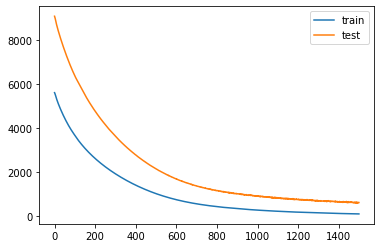

In [387]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


In [388]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
ls_test_70["DL_PRED_ENERGY"] = res

<ipython-input-388-5b482d47debb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_test_70["DL_PRED_ENERGY"] = res


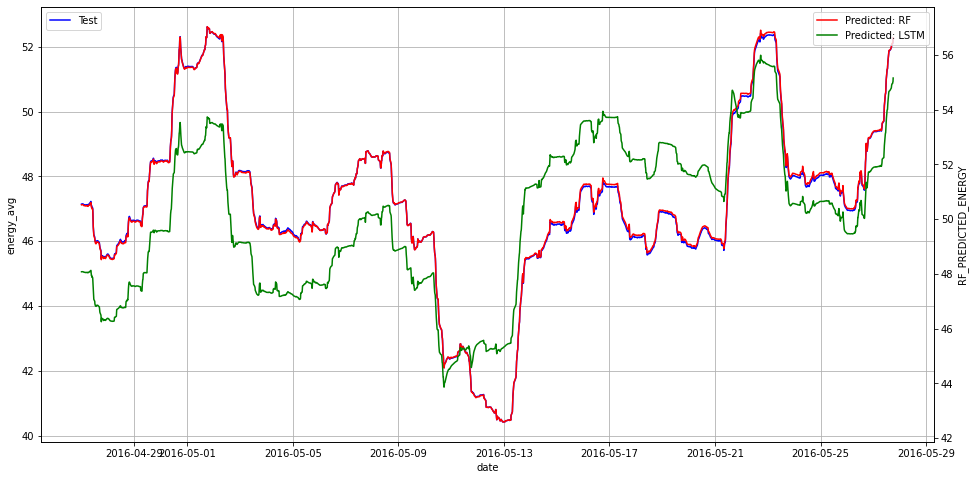

In [389]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_test_70["date"], y = ls_test_70["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_test_70["date"], y = rf_test_70["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_test_70["date"], y = ls_test_70["DL_PRED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [390]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
ls_val_70["DL_PRED_ENERGY"] = res

<ipython-input-390-fde62960632d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_val_70["DL_PRED_ENERGY"] = res


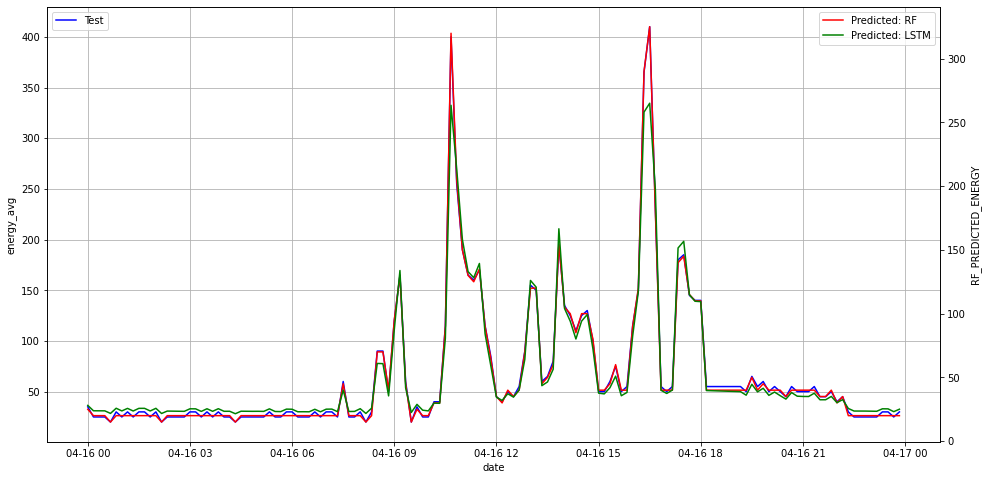

In [391]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_val_70["date"], y = ls_val_70["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_val_70["date"], y = rf_val_70["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_val_70["date"], y = ls_val_70["DL_PRED_ENERGY"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [393]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(ls_test_70.energy_avg, ls_test_70.DL_PRED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(ls_val_70.energy_avg, ls_val_70.DL_PRED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(ls_test_70.energy_avg, ls_test_70.DL_PRED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(ls_val_70.energy_avg, ls_val_70.DL_PRED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(ls_test_70.energy_avg, ls_test_70.DL_PRED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(ls_val_70.energy_avg, ls_val_70.DL_PRED_ENERGY))

RMSE FOR TESTDATA 11.750096913412015
RMSE FOR SINGLE TEST HORIZON 25.17890151515396
MAE FOR TESTDATA 5.2717382808340165
MAE FOR SINGLE TEST HORIZON 15.202068169911703
MAPE FOR TESTDATA 0.09975913169713414
MAPE FOR SINGLE TEST HORIZON 0.18945231532016304


In [394]:
# ANALYSIS FOR 75% OF DATASET AS TRAIN DATA
col = 'energy_avg'

ls_train_75, ls_val_75, ls_test_75 = get_train_val_test(75)

model_k, x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(ls_train_75, ls_val_75, ls_test_75, col)

x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=1500, batch_size=96, verbose=2)

Epoch 1/1500
154/154 - 2s - loss: 5628.7456 - val_loss: 4722.8643
Epoch 2/1500
154/154 - 0s - loss: 5600.1611 - val_loss: 4690.7739
Epoch 3/1500
154/154 - 0s - loss: 5567.9194 - val_loss: 4655.5459
Epoch 4/1500
154/154 - 0s - loss: 5535.5732 - val_loss: 4622.8726
Epoch 5/1500
154/154 - 0s - loss: 5504.1699 - val_loss: 4591.8540
Epoch 6/1500
154/154 - 0s - loss: 5473.0757 - val_loss: 4561.4004
Epoch 7/1500
154/154 - 0s - loss: 5441.7046 - val_loss: 4530.6504
Epoch 8/1500
154/154 - 0s - loss: 5409.4209 - val_loss: 4498.5723
Epoch 9/1500
154/154 - 0s - loss: 5375.7319 - val_loss: 4464.1621
Epoch 10/1500
154/154 - 0s - loss: 5341.1035 - val_loss: 4428.6631
Epoch 11/1500
154/154 - 0s - loss: 5307.4302 - val_loss: 4394.7275
Epoch 12/1500
154/154 - 0s - loss: 5275.5195 - val_loss: 4362.5732
Epoch 13/1500
154/154 - 0s - loss: 5244.9814 - val_loss: 4331.7217
Epoch 14/1500
154/154 - 0s - loss: 5215.4839 - val_loss: 4301.7158
Epoch 15/1500
154/154 - 0s - loss: 5186.7852 - val_loss: 4272.5059
Epoc

154/154 - 0s - loss: 3282.2402 - val_loss: 2376.6272
Epoch 124/1500
154/154 - 0s - loss: 3270.2847 - val_loss: 2364.6118
Epoch 125/1500
154/154 - 0s - loss: 3258.3706 - val_loss: 2354.3181
Epoch 126/1500
154/154 - 0s - loss: 3246.5305 - val_loss: 2342.7666
Epoch 127/1500
154/154 - 0s - loss: 3234.7375 - val_loss: 2330.9492
Epoch 128/1500
154/154 - 0s - loss: 3223.0017 - val_loss: 2320.1670
Epoch 129/1500
154/154 - 0s - loss: 3211.2986 - val_loss: 2309.9434
Epoch 130/1500
154/154 - 0s - loss: 3199.6760 - val_loss: 2299.0161
Epoch 131/1500
154/154 - 0s - loss: 3188.0959 - val_loss: 2287.7339
Epoch 132/1500
154/154 - 0s - loss: 3176.5845 - val_loss: 2277.5149
Epoch 133/1500
154/154 - 0s - loss: 3165.1443 - val_loss: 2267.3745
Epoch 134/1500
154/154 - 0s - loss: 3153.7725 - val_loss: 2256.8386
Epoch 135/1500
154/154 - 0s - loss: 3142.4475 - val_loss: 2246.6475
Epoch 136/1500
154/154 - 0s - loss: 3131.2344 - val_loss: 2236.1575
Epoch 137/1500
154/154 - 0s - loss: 3120.0708 - val_loss: 2224.

Epoch 244/1500
154/154 - 0s - loss: 2176.0068 - val_loss: 1393.7528
Epoch 245/1500
154/154 - 0s - loss: 2168.8735 - val_loss: 1388.2645
Epoch 246/1500
154/154 - 0s - loss: 2161.7419 - val_loss: 1382.6213
Epoch 247/1500
154/154 - 0s - loss: 2154.6780 - val_loss: 1376.7384
Epoch 248/1500
154/154 - 0s - loss: 2147.6372 - val_loss: 1371.5352
Epoch 249/1500
154/154 - 0s - loss: 2140.6138 - val_loss: 1366.0780
Epoch 250/1500
154/154 - 0s - loss: 2133.6018 - val_loss: 1359.8055
Epoch 251/1500
154/154 - 0s - loss: 2126.6077 - val_loss: 1354.3721
Epoch 252/1500
154/154 - 0s - loss: 2119.6494 - val_loss: 1348.2483
Epoch 253/1500
154/154 - 0s - loss: 2112.7329 - val_loss: 1343.1002
Epoch 254/1500
154/154 - 0s - loss: 2105.8137 - val_loss: 1337.8876
Epoch 255/1500
154/154 - 0s - loss: 2098.9460 - val_loss: 1331.7062
Epoch 256/1500
154/154 - 0s - loss: 2092.0930 - val_loss: 1326.6165
Epoch 257/1500
154/154 - 0s - loss: 2085.2434 - val_loss: 1319.6713
Epoch 258/1500
154/154 - 0s - loss: 2078.4456 - 

154/154 - 0s - loss: 1459.9199 - val_loss: 814.3226
Epoch 366/1500
154/154 - 0s - loss: 1455.0494 - val_loss: 809.2570
Epoch 367/1500
154/154 - 0s - loss: 1450.2042 - val_loss: 806.9994
Epoch 368/1500
154/154 - 0s - loss: 1445.3690 - val_loss: 802.8281
Epoch 369/1500
154/154 - 0s - loss: 1440.5300 - val_loss: 798.3230
Epoch 370/1500
154/154 - 0s - loss: 1435.7352 - val_loss: 795.0236
Epoch 371/1500
154/154 - 0s - loss: 1430.9291 - val_loss: 791.1370
Epoch 372/1500
154/154 - 0s - loss: 1426.1304 - val_loss: 787.3789
Epoch 373/1500
154/154 - 0s - loss: 1421.3881 - val_loss: 783.6624
Epoch 374/1500
154/154 - 0s - loss: 1416.6405 - val_loss: 780.1294
Epoch 375/1500
154/154 - 0s - loss: 1411.9004 - val_loss: 776.3474
Epoch 376/1500
154/154 - 0s - loss: 1407.1733 - val_loss: 772.8733
Epoch 377/1500
154/154 - 0s - loss: 1402.4532 - val_loss: 769.0099
Epoch 378/1500
154/154 - 0s - loss: 1397.7637 - val_loss: 765.3687
Epoch 379/1500
154/154 - 0s - loss: 1393.0890 - val_loss: 761.4587
Epoch 380/

Epoch 488/1500
154/154 - 0s - loss: 964.8922 - val_loss: 445.8369
Epoch 489/1500
154/154 - 0s - loss: 961.6900 - val_loss: 443.0890
Epoch 490/1500
154/154 - 0s - loss: 958.4631 - val_loss: 440.6361
Epoch 491/1500
154/154 - 0s - loss: 955.2719 - val_loss: 437.7404
Epoch 492/1500
154/154 - 0s - loss: 952.0916 - val_loss: 436.8412
Epoch 493/1500
154/154 - 0s - loss: 948.9094 - val_loss: 434.5613
Epoch 494/1500
154/154 - 0s - loss: 945.7642 - val_loss: 432.0011
Epoch 495/1500
154/154 - 0s - loss: 942.6077 - val_loss: 429.8073
Epoch 496/1500
154/154 - 0s - loss: 939.4905 - val_loss: 428.1571
Epoch 497/1500
154/154 - 0s - loss: 936.3821 - val_loss: 425.8907
Epoch 498/1500
154/154 - 0s - loss: 933.3074 - val_loss: 424.0434
Epoch 499/1500
154/154 - 0s - loss: 930.2017 - val_loss: 421.9908
Epoch 500/1500
154/154 - 0s - loss: 927.1262 - val_loss: 419.5189
Epoch 501/1500
154/154 - 0s - loss: 924.0560 - val_loss: 417.8857
Epoch 502/1500
154/154 - 0s - loss: 921.0021 - val_loss: 415.3065
Epoch 503/

154/154 - 0s - loss: 648.6663 - val_loss: 254.1291
Epoch 613/1500
154/154 - 0s - loss: 646.7417 - val_loss: 253.2859
Epoch 614/1500
154/154 - 0s - loss: 644.8019 - val_loss: 251.6657
Epoch 615/1500
154/154 - 0s - loss: 642.8956 - val_loss: 250.4920
Epoch 616/1500
154/154 - 0s - loss: 640.9872 - val_loss: 249.7011
Epoch 617/1500
154/154 - 0s - loss: 639.0720 - val_loss: 248.7021
Epoch 618/1500
154/154 - 0s - loss: 637.1682 - val_loss: 247.3030
Epoch 619/1500
154/154 - 0s - loss: 635.2949 - val_loss: 246.7534
Epoch 620/1500
154/154 - 0s - loss: 633.4092 - val_loss: 246.5174
Epoch 621/1500
154/154 - 0s - loss: 631.5405 - val_loss: 245.8664
Epoch 622/1500
154/154 - 0s - loss: 629.6686 - val_loss: 244.2355
Epoch 623/1500
154/154 - 0s - loss: 627.8346 - val_loss: 243.3374
Epoch 624/1500
154/154 - 0s - loss: 625.9579 - val_loss: 243.0705
Epoch 625/1500
154/154 - 0s - loss: 624.1573 - val_loss: 241.0833
Epoch 626/1500
154/154 - 0s - loss: 622.3040 - val_loss: 240.0180
Epoch 627/1500
154/154 - 

Epoch 737/1500
154/154 - 0s - loss: 459.5094 - val_loss: 175.1504
Epoch 738/1500
154/154 - 0s - loss: 458.2881 - val_loss: 175.1723
Epoch 739/1500
154/154 - 0s - loss: 457.1115 - val_loss: 173.2526
Epoch 740/1500
154/154 - 0s - loss: 456.0069 - val_loss: 174.4619
Epoch 741/1500
154/154 - 0s - loss: 454.8317 - val_loss: 173.2836
Epoch 742/1500
154/154 - 0s - loss: 453.6711 - val_loss: 174.5659
Epoch 743/1500
154/154 - 0s - loss: 452.5731 - val_loss: 171.3604
Epoch 744/1500
154/154 - 0s - loss: 451.4332 - val_loss: 172.4288
Epoch 745/1500
154/154 - 0s - loss: 450.3282 - val_loss: 172.8069
Epoch 746/1500
154/154 - 0s - loss: 449.1546 - val_loss: 171.9187
Epoch 747/1500
154/154 - 0s - loss: 448.1002 - val_loss: 170.7401
Epoch 748/1500
154/154 - 0s - loss: 446.9216 - val_loss: 171.6910
Epoch 749/1500
154/154 - 0s - loss: 445.8359 - val_loss: 171.6657
Epoch 750/1500
154/154 - 0s - loss: 444.7213 - val_loss: 170.5592
Epoch 751/1500
154/154 - 0s - loss: 443.5887 - val_loss: 169.2094
Epoch 752/

154/154 - 0s - loss: 341.3704 - val_loss: 146.3879
Epoch 862/1500
154/154 - 0s - loss: 340.5931 - val_loss: 146.5959
Epoch 863/1500
154/154 - 0s - loss: 339.8254 - val_loss: 145.2535
Epoch 864/1500
154/154 - 0s - loss: 339.0353 - val_loss: 146.2260
Epoch 865/1500
154/154 - 0s - loss: 338.2695 - val_loss: 146.9245
Epoch 866/1500
154/154 - 0s - loss: 337.4690 - val_loss: 145.0998
Epoch 867/1500
154/154 - 0s - loss: 336.7274 - val_loss: 145.9818
Epoch 868/1500
154/154 - 0s - loss: 336.0106 - val_loss: 146.3904
Epoch 869/1500
154/154 - 0s - loss: 335.2564 - val_loss: 144.1449
Epoch 870/1500
154/154 - 0s - loss: 334.3979 - val_loss: 144.9523
Epoch 871/1500
154/154 - 0s - loss: 333.7324 - val_loss: 144.1838
Epoch 872/1500
154/154 - 0s - loss: 332.8771 - val_loss: 144.5770
Epoch 873/1500
154/154 - 0s - loss: 332.1476 - val_loss: 143.2577
Epoch 874/1500
154/154 - 0s - loss: 331.3664 - val_loss: 143.2926
Epoch 875/1500
154/154 - 0s - loss: 330.6216 - val_loss: 143.3091
Epoch 876/1500
154/154 - 

Epoch 986/1500
154/154 - 0s - loss: 258.8629 - val_loss: 136.6821
Epoch 987/1500
154/154 - 0s - loss: 258.3396 - val_loss: 135.4025
Epoch 988/1500
154/154 - 0s - loss: 257.6725 - val_loss: 133.1917
Epoch 989/1500
154/154 - 0s - loss: 257.2393 - val_loss: 130.3722
Epoch 990/1500
154/154 - 0s - loss: 256.7296 - val_loss: 135.1986
Epoch 991/1500
154/154 - 0s - loss: 256.0723 - val_loss: 135.6962
Epoch 992/1500
154/154 - 0s - loss: 255.5975 - val_loss: 133.4637
Epoch 993/1500
154/154 - 0s - loss: 254.9643 - val_loss: 134.6406
Epoch 994/1500
154/154 - 0s - loss: 254.4911 - val_loss: 131.4864
Epoch 995/1500
154/154 - 0s - loss: 253.9301 - val_loss: 135.1456
Epoch 996/1500
154/154 - 0s - loss: 253.5031 - val_loss: 134.8004
Epoch 997/1500
154/154 - 0s - loss: 252.8256 - val_loss: 134.0601
Epoch 998/1500
154/154 - 0s - loss: 252.2374 - val_loss: 133.1844
Epoch 999/1500
154/154 - 0s - loss: 251.7857 - val_loss: 133.9309
Epoch 1000/1500
154/154 - 0s - loss: 251.2438 - val_loss: 132.7578
Epoch 100

Epoch 1109/1500
154/154 - 0s - loss: 200.3342 - val_loss: 133.3813
Epoch 1110/1500
154/154 - 0s - loss: 199.9180 - val_loss: 128.6593
Epoch 1111/1500
154/154 - 0s - loss: 199.5058 - val_loss: 128.5592
Epoch 1112/1500
154/154 - 0s - loss: 199.1530 - val_loss: 127.6891
Epoch 1113/1500
154/154 - 0s - loss: 198.7777 - val_loss: 126.8112
Epoch 1114/1500
154/154 - 0s - loss: 198.3043 - val_loss: 126.9228
Epoch 1115/1500
154/154 - 0s - loss: 197.9534 - val_loss: 130.1530
Epoch 1116/1500
154/154 - 0s - loss: 197.4314 - val_loss: 120.1825
Epoch 1117/1500
154/154 - 0s - loss: 197.1868 - val_loss: 132.6976
Epoch 1118/1500
154/154 - 0s - loss: 196.7725 - val_loss: 126.6509
Epoch 1119/1500
154/154 - 0s - loss: 196.3697 - val_loss: 126.7034
Epoch 1120/1500
154/154 - 0s - loss: 195.9374 - val_loss: 130.1149
Epoch 1121/1500
154/154 - 0s - loss: 195.5785 - val_loss: 126.5321
Epoch 1122/1500
154/154 - 0s - loss: 195.1521 - val_loss: 127.4520
Epoch 1123/1500
154/154 - 0s - loss: 194.7989 - val_loss: 124.

Epoch 1232/1500
154/154 - 0s - loss: 157.4229 - val_loss: 118.2853
Epoch 1233/1500
154/154 - 0s - loss: 157.0505 - val_loss: 126.7626
Epoch 1234/1500
154/154 - 0s - loss: 156.8699 - val_loss: 122.2843
Epoch 1235/1500
154/154 - 0s - loss: 156.4877 - val_loss: 121.1807
Epoch 1236/1500
154/154 - 0s - loss: 156.2829 - val_loss: 124.7128
Epoch 1237/1500
154/154 - 0s - loss: 155.9449 - val_loss: 124.6269
Epoch 1238/1500
154/154 - 0s - loss: 155.6665 - val_loss: 122.5093
Epoch 1239/1500
154/154 - 0s - loss: 155.3362 - val_loss: 125.5583
Epoch 1240/1500
154/154 - 0s - loss: 155.0875 - val_loss: 121.6510
Epoch 1241/1500
154/154 - 0s - loss: 154.8101 - val_loss: 118.9516
Epoch 1242/1500
154/154 - 0s - loss: 154.4686 - val_loss: 126.6617
Epoch 1243/1500
154/154 - 0s - loss: 154.1378 - val_loss: 121.2351
Epoch 1244/1500
154/154 - 0s - loss: 153.8288 - val_loss: 126.3120
Epoch 1245/1500
154/154 - 0s - loss: 153.5751 - val_loss: 124.1814
Epoch 1246/1500
154/154 - 0s - loss: 153.3088 - val_loss: 127.

Epoch 1355/1500
154/154 - 0s - loss: 125.3073 - val_loss: 122.9452
Epoch 1356/1500
154/154 - 0s - loss: 125.1452 - val_loss: 118.6972
Epoch 1357/1500
154/154 - 0s - loss: 124.8597 - val_loss: 119.7747
Epoch 1358/1500
154/154 - 0s - loss: 124.7583 - val_loss: 121.2892
Epoch 1359/1500
154/154 - 0s - loss: 124.5326 - val_loss: 121.1290
Epoch 1360/1500
154/154 - 0s - loss: 124.3098 - val_loss: 121.6706
Epoch 1361/1500
154/154 - 0s - loss: 123.9916 - val_loss: 123.2348
Epoch 1362/1500
154/154 - 0s - loss: 123.8380 - val_loss: 114.5457
Epoch 1363/1500
154/154 - 0s - loss: 123.6444 - val_loss: 133.0937
Epoch 1364/1500
154/154 - 0s - loss: 123.3728 - val_loss: 119.7840
Epoch 1365/1500
154/154 - 0s - loss: 123.1592 - val_loss: 124.0181
Epoch 1366/1500
154/154 - 0s - loss: 122.9263 - val_loss: 129.4312
Epoch 1367/1500
154/154 - 0s - loss: 122.7738 - val_loss: 121.0567
Epoch 1368/1500
154/154 - 0s - loss: 122.5090 - val_loss: 125.9962
Epoch 1369/1500
154/154 - 0s - loss: 122.4202 - val_loss: 120.

Epoch 1478/1500
154/154 - 0s - loss: 101.3660 - val_loss: 127.3928
Epoch 1479/1500
154/154 - 0s - loss: 101.0817 - val_loss: 123.4323
Epoch 1480/1500
154/154 - 0s - loss: 100.8412 - val_loss: 133.6172
Epoch 1481/1500
154/154 - 0s - loss: 100.7879 - val_loss: 115.1248
Epoch 1482/1500
154/154 - 0s - loss: 100.6337 - val_loss: 121.7742
Epoch 1483/1500
154/154 - 0s - loss: 100.4735 - val_loss: 128.7762
Epoch 1484/1500
154/154 - 0s - loss: 100.2817 - val_loss: 116.2029
Epoch 1485/1500
154/154 - 0s - loss: 100.1302 - val_loss: 121.1459
Epoch 1486/1500
154/154 - 0s - loss: 99.9783 - val_loss: 115.2926
Epoch 1487/1500
154/154 - 0s - loss: 99.7096 - val_loss: 119.9058
Epoch 1488/1500
154/154 - 0s - loss: 99.6325 - val_loss: 118.9074
Epoch 1489/1500
154/154 - 0s - loss: 99.4257 - val_loss: 124.7535
Epoch 1490/1500
154/154 - 0s - loss: 99.2280 - val_loss: 120.4845
Epoch 1491/1500
154/154 - 0s - loss: 99.1284 - val_loss: 120.2517
Epoch 1492/1500
154/154 - 0s - loss: 98.9836 - val_loss: 118.2542
Ep

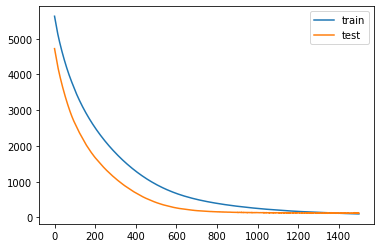

In [395]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


In [396]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
ls_test_75["DL_PRED_ENERGY"] = res

<ipython-input-396-b8f8577e8257>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_test_75["DL_PRED_ENERGY"] = res


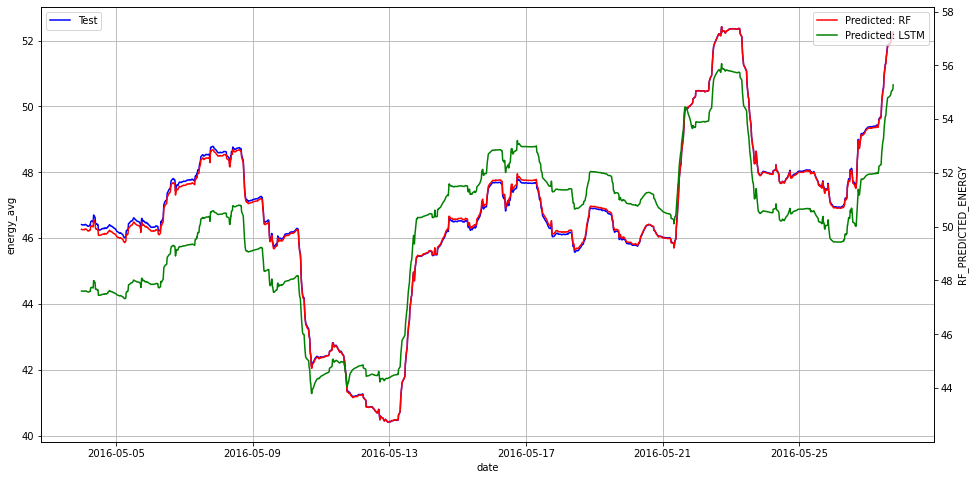

In [397]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_test_75["date"], y = ls_test_75["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_test_75["date"], y = rf_test_75["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_test_75["date"], y = ls_test_75["DL_PRED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [398]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
ls_val_75["DL_PRED_ENERGY"] = res

<ipython-input-398-d0cfeda5708c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_val_75["DL_PRED_ENERGY"] = res


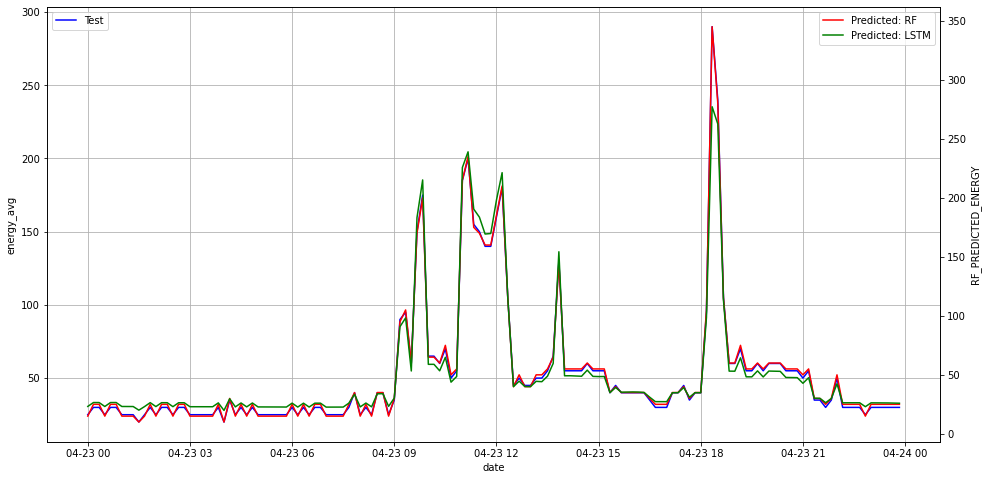

In [399]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_val_75["date"], y = ls_val_75["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_val_75["date"], y = rf_val_75["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_val_75["date"], y = ls_val_75["DL_PRED_ENERGY"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [400]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(ls_test_75.energy_avg, ls_test_75.DL_PRED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(ls_val_75.energy_avg, ls_val_75.DL_PRED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(ls_test_75.energy_avg, ls_test_75.DL_PRED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(ls_val_75.energy_avg, ls_val_75.DL_PRED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(ls_test_75.energy_avg, ls_test_75.DL_PRED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(ls_val_75.energy_avg, ls_val_75.DL_PRED_ENERGY))

RMSE FOR TESTDATA 11.429249932115981
RMSE FOR SINGLE TEST HORIZON 10.98132589063018
MAE FOR TESTDATA 4.899646825737435
MAE FOR SINGLE TEST HORIZON 6.850571155548096
MAPE FOR TESTDATA 0.0847671001984103
MAPE FOR SINGLE TEST HORIZON 0.11527548592864825


In [401]:
# ANALYSIS FOR 80% OF DATASET AS TRAIN DATA
col = 'energy_avg'

ls_train_80, ls_val_80, ls_test_80 = get_train_val_test(80)

model_k, x_train,y_train,x_test,y_test,x_val,y_val,x_train_scaled,x_test_scaled,x_val_scaled = apply_lstm(ls_train_80, ls_val_80, ls_test_80, col)

x_val_reshaped = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
x_t_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
history = model_k.fit(x_t_reshaped, y_train, validation_data=(x_val_reshaped, y_val),\
epochs=1500, batch_size=96, verbose=2)

Epoch 1/1500
164/164 - 2s - loss: 5483.2593 - val_loss: 11095.1689
Epoch 2/1500
164/164 - 0s - loss: 5453.0029 - val_loss: 11053.0498
Epoch 3/1500
164/164 - 0s - loss: 5422.1997 - val_loss: 11009.6445
Epoch 4/1500
164/164 - 0s - loss: 5390.7964 - val_loss: 10965.4082
Epoch 5/1500
164/164 - 0s - loss: 5358.5103 - val_loss: 10918.9102
Epoch 6/1500
164/164 - 0s - loss: 5324.5796 - val_loss: 10868.1387
Epoch 7/1500
164/164 - 0s - loss: 5287.4038 - val_loss: 10810.0264
Epoch 8/1500
164/164 - 0s - loss: 5248.2754 - val_loss: 10756.0400
Epoch 9/1500
164/164 - 0s - loss: 5211.7188 - val_loss: 10707.1289
Epoch 10/1500
164/164 - 0s - loss: 5177.1470 - val_loss: 10660.7461
Epoch 11/1500
164/164 - 0s - loss: 5143.9507 - val_loss: 10615.9033
Epoch 12/1500
164/164 - 0s - loss: 5111.9307 - val_loss: 10572.2188
Epoch 13/1500
164/164 - 0s - loss: 5080.8999 - val_loss: 10529.6230
Epoch 14/1500
164/164 - 0s - loss: 5050.7334 - val_loss: 10487.7920
Epoch 15/1500
164/164 - 0s - loss: 5021.3193 - val_loss: 

Epoch 123/1500
164/164 - 0s - loss: 3081.3547 - val_loss: 7413.0469
Epoch 124/1500
164/164 - 0s - loss: 3069.4197 - val_loss: 7392.1475
Epoch 125/1500
164/164 - 0s - loss: 3057.5698 - val_loss: 7370.3540
Epoch 126/1500
164/164 - 0s - loss: 3045.7922 - val_loss: 7349.7822
Epoch 127/1500
164/164 - 0s - loss: 3034.0923 - val_loss: 7328.7319
Epoch 128/1500
164/164 - 0s - loss: 3022.4761 - val_loss: 7308.6040
Epoch 129/1500
164/164 - 0s - loss: 3010.9158 - val_loss: 7287.3281
Epoch 130/1500
164/164 - 0s - loss: 2999.4177 - val_loss: 7266.3833
Epoch 131/1500
164/164 - 0s - loss: 2988.0007 - val_loss: 7244.9897
Epoch 132/1500
164/164 - 0s - loss: 2976.6523 - val_loss: 7224.4131
Epoch 133/1500
164/164 - 0s - loss: 2965.3699 - val_loss: 7204.5059
Epoch 134/1500
164/164 - 0s - loss: 2954.1562 - val_loss: 7183.5869
Epoch 135/1500
164/164 - 0s - loss: 2943.0149 - val_loss: 7162.2993
Epoch 136/1500
164/164 - 0s - loss: 2931.9329 - val_loss: 7143.1582
Epoch 137/1500
164/164 - 0s - loss: 2920.9290 - 

Epoch 244/1500
164/164 - 0s - loss: 1992.4193 - val_loss: 5232.4219
Epoch 245/1500
164/164 - 0s - loss: 1985.4360 - val_loss: 5217.8652
Epoch 246/1500
164/164 - 0s - loss: 1978.4773 - val_loss: 5202.8428
Epoch 247/1500
164/164 - 0s - loss: 1971.5466 - val_loss: 5188.8604
Epoch 248/1500
164/164 - 0s - loss: 1964.6565 - val_loss: 5171.1362
Epoch 249/1500
164/164 - 0s - loss: 1957.7772 - val_loss: 5157.0703
Epoch 250/1500
164/164 - 0s - loss: 1950.9235 - val_loss: 5141.2632
Epoch 251/1500
164/164 - 0s - loss: 1944.1084 - val_loss: 5126.7446
Epoch 252/1500
164/164 - 0s - loss: 1937.2883 - val_loss: 5111.7500
Epoch 253/1500
164/164 - 0s - loss: 1930.5090 - val_loss: 5097.1230
Epoch 254/1500
164/164 - 0s - loss: 1923.7538 - val_loss: 5083.3887
Epoch 255/1500
164/164 - 0s - loss: 1917.0128 - val_loss: 5066.3330
Epoch 256/1500
164/164 - 0s - loss: 1910.3102 - val_loss: 5051.3262
Epoch 257/1500
164/164 - 0s - loss: 1903.6245 - val_loss: 5039.8257
Epoch 258/1500
164/164 - 0s - loss: 1896.9679 - 

Epoch 365/1500
164/164 - 0s - loss: 1297.0554 - val_loss: 3664.7041
Epoch 366/1500
164/164 - 0s - loss: 1292.4016 - val_loss: 3652.1162
Epoch 367/1500
164/164 - 0s - loss: 1287.7555 - val_loss: 3640.3330
Epoch 368/1500
164/164 - 0s - loss: 1283.1198 - val_loss: 3629.7551
Epoch 369/1500
164/164 - 0s - loss: 1278.5037 - val_loss: 3620.6782
Epoch 370/1500
164/164 - 0s - loss: 1273.8956 - val_loss: 3608.6289
Epoch 371/1500
164/164 - 0s - loss: 1269.3121 - val_loss: 3599.7117
Epoch 372/1500
164/164 - 0s - loss: 1264.7407 - val_loss: 3586.6729
Epoch 373/1500
164/164 - 0s - loss: 1260.1970 - val_loss: 3574.8467
Epoch 374/1500
164/164 - 0s - loss: 1255.6710 - val_loss: 3564.8086
Epoch 375/1500
164/164 - 0s - loss: 1251.1492 - val_loss: 3559.2253
Epoch 376/1500
164/164 - 0s - loss: 1246.6511 - val_loss: 3544.1333
Epoch 377/1500
164/164 - 0s - loss: 1242.1711 - val_loss: 3533.4519
Epoch 378/1500
164/164 - 0s - loss: 1237.7212 - val_loss: 3525.4304
Epoch 379/1500
164/164 - 0s - loss: 1233.2704 - 

164/164 - 0s - loss: 839.8001 - val_loss: 2565.8628
Epoch 487/1500
164/164 - 0s - loss: 836.8467 - val_loss: 2558.2366
Epoch 488/1500
164/164 - 0s - loss: 833.9172 - val_loss: 2551.3147
Epoch 489/1500
164/164 - 0s - loss: 830.9724 - val_loss: 2540.9414
Epoch 490/1500
164/164 - 0s - loss: 828.0610 - val_loss: 2531.6211
Epoch 491/1500
164/164 - 0s - loss: 825.1525 - val_loss: 2525.8828
Epoch 492/1500
164/164 - 0s - loss: 822.2623 - val_loss: 2521.1575
Epoch 493/1500
164/164 - 0s - loss: 819.3604 - val_loss: 2517.9705
Epoch 494/1500
164/164 - 0s - loss: 816.5025 - val_loss: 2506.8257
Epoch 495/1500
164/164 - 0s - loss: 813.6335 - val_loss: 2496.5664
Epoch 496/1500
164/164 - 0s - loss: 810.7927 - val_loss: 2494.9763
Epoch 497/1500
164/164 - 0s - loss: 807.9510 - val_loss: 2481.4949
Epoch 498/1500
164/164 - 0s - loss: 805.1386 - val_loss: 2473.9565
Epoch 499/1500
164/164 - 0s - loss: 802.3364 - val_loss: 2467.8186
Epoch 500/1500
164/164 - 0s - loss: 799.5579 - val_loss: 2465.5425
Epoch 501/

Epoch 609/1500
164/164 - 0s - loss: 559.0571 - val_loss: 1865.3490
Epoch 610/1500
164/164 - 0s - loss: 557.3200 - val_loss: 1852.2474
Epoch 611/1500
164/164 - 0s - loss: 555.6373 - val_loss: 1845.8932
Epoch 612/1500
164/164 - 0s - loss: 553.9631 - val_loss: 1843.8767
Epoch 613/1500
164/164 - 0s - loss: 552.2789 - val_loss: 1838.7249
Epoch 614/1500
164/164 - 0s - loss: 550.6005 - val_loss: 1845.7084
Epoch 615/1500
164/164 - 0s - loss: 548.9499 - val_loss: 1830.4045
Epoch 616/1500
164/164 - 0s - loss: 547.2836 - val_loss: 1822.2474
Epoch 617/1500
164/164 - 0s - loss: 545.6774 - val_loss: 1823.0308
Epoch 618/1500
164/164 - 0s - loss: 544.0384 - val_loss: 1820.9503
Epoch 619/1500
164/164 - 0s - loss: 542.3718 - val_loss: 1822.5929
Epoch 620/1500
164/164 - 0s - loss: 540.8030 - val_loss: 1818.5933
Epoch 621/1500
164/164 - 0s - loss: 539.1821 - val_loss: 1812.8120
Epoch 622/1500
164/164 - 0s - loss: 537.5692 - val_loss: 1814.1702
Epoch 623/1500
164/164 - 0s - loss: 535.9612 - val_loss: 1802.

Epoch 732/1500
164/164 - 0s - loss: 396.8248 - val_loss: 1481.0028
Epoch 733/1500
164/164 - 0s - loss: 395.7614 - val_loss: 1476.7465
Epoch 734/1500
164/164 - 0s - loss: 394.7563 - val_loss: 1478.0815
Epoch 735/1500
164/164 - 0s - loss: 393.6999 - val_loss: 1479.6111
Epoch 736/1500
164/164 - 0s - loss: 392.7072 - val_loss: 1470.7642
Epoch 737/1500
164/164 - 0s - loss: 391.6983 - val_loss: 1467.2548
Epoch 738/1500
164/164 - 0s - loss: 390.7167 - val_loss: 1480.1465
Epoch 739/1500
164/164 - 0s - loss: 389.6844 - val_loss: 1461.2533
Epoch 740/1500
164/164 - 0s - loss: 388.6961 - val_loss: 1456.1381
Epoch 741/1500
164/164 - 0s - loss: 387.6876 - val_loss: 1470.6603
Epoch 742/1500
164/164 - 0s - loss: 386.6472 - val_loss: 1471.5564
Epoch 743/1500
164/164 - 0s - loss: 385.7012 - val_loss: 1453.5193
Epoch 744/1500
164/164 - 0s - loss: 384.6809 - val_loss: 1462.3860
Epoch 745/1500
164/164 - 0s - loss: 383.7328 - val_loss: 1465.2007
Epoch 746/1500
164/164 - 0s - loss: 382.7400 - val_loss: 1452.

Epoch 855/1500
164/164 - 0s - loss: 293.0714 - val_loss: 1276.4927
Epoch 856/1500
164/164 - 0s - loss: 292.4442 - val_loss: 1298.3351
Epoch 857/1500
164/164 - 0s - loss: 291.7421 - val_loss: 1281.4578
Epoch 858/1500
164/164 - 0s - loss: 291.0327 - val_loss: 1270.9155
Epoch 859/1500
164/164 - 0s - loss: 290.3350 - val_loss: 1282.9355
Epoch 860/1500
164/164 - 0s - loss: 289.7070 - val_loss: 1271.7502
Epoch 861/1500
164/164 - 0s - loss: 288.9824 - val_loss: 1246.8989
Epoch 862/1500
164/164 - 0s - loss: 288.3682 - val_loss: 1279.6447
Epoch 863/1500
164/164 - 0s - loss: 287.6773 - val_loss: 1295.8546
Epoch 864/1500
164/164 - 0s - loss: 286.9816 - val_loss: 1274.8831
Epoch 865/1500
164/164 - 0s - loss: 286.3095 - val_loss: 1292.9227
Epoch 866/1500
164/164 - 0s - loss: 285.6248 - val_loss: 1257.3292
Epoch 867/1500
164/164 - 0s - loss: 285.0190 - val_loss: 1281.9175
Epoch 868/1500
164/164 - 0s - loss: 284.2787 - val_loss: 1252.3915
Epoch 869/1500
164/164 - 0s - loss: 283.6088 - val_loss: 1294.

Epoch 978/1500
164/164 - 0s - loss: 221.1781 - val_loss: 1185.5310
Epoch 979/1500
164/164 - 0s - loss: 220.6266 - val_loss: 1162.1454
Epoch 980/1500
164/164 - 0s - loss: 220.1820 - val_loss: 1170.8538
Epoch 981/1500
164/164 - 0s - loss: 219.6721 - val_loss: 1168.2349
Epoch 982/1500
164/164 - 0s - loss: 219.1722 - val_loss: 1145.0590
Epoch 983/1500
164/164 - 0s - loss: 218.7301 - val_loss: 1162.0280
Epoch 984/1500
164/164 - 0s - loss: 218.1959 - val_loss: 1157.8303
Epoch 985/1500
164/164 - 0s - loss: 217.7865 - val_loss: 1171.3206
Epoch 986/1500
164/164 - 0s - loss: 217.2511 - val_loss: 1149.1962
Epoch 987/1500
164/164 - 0s - loss: 216.7795 - val_loss: 1148.6392
Epoch 988/1500
164/164 - 0s - loss: 216.3348 - val_loss: 1147.6549
Epoch 989/1500
164/164 - 0s - loss: 215.9057 - val_loss: 1155.6219
Epoch 990/1500
164/164 - 0s - loss: 215.3137 - val_loss: 1142.0170
Epoch 991/1500
164/164 - 0s - loss: 214.9130 - val_loss: 1173.2966
Epoch 992/1500
164/164 - 0s - loss: 214.3790 - val_loss: 1148.

Epoch 1099/1500
164/164 - 0s - loss: 170.5510 - val_loss: 1066.1777
Epoch 1100/1500
164/164 - 0s - loss: 170.1563 - val_loss: 1084.9664
Epoch 1101/1500
164/164 - 0s - loss: 169.7496 - val_loss: 1063.7139
Epoch 1102/1500
164/164 - 0s - loss: 169.3313 - val_loss: 1062.4479
Epoch 1103/1500
164/164 - 0s - loss: 169.0664 - val_loss: 1091.2723
Epoch 1104/1500
164/164 - 0s - loss: 168.7090 - val_loss: 1091.5870
Epoch 1105/1500
164/164 - 0s - loss: 168.3617 - val_loss: 1081.2142
Epoch 1106/1500
164/164 - 0s - loss: 167.9434 - val_loss: 1074.1619
Epoch 1107/1500
164/164 - 0s - loss: 167.6030 - val_loss: 1067.3533
Epoch 1108/1500
164/164 - 0s - loss: 167.2430 - val_loss: 1088.4906
Epoch 1109/1500
164/164 - 0s - loss: 167.0344 - val_loss: 1078.3502
Epoch 1110/1500
164/164 - 0s - loss: 166.5679 - val_loss: 1078.7079
Epoch 1111/1500
164/164 - 0s - loss: 166.2937 - val_loss: 1081.9517
Epoch 1112/1500
164/164 - 0s - loss: 165.8693 - val_loss: 1088.7485
Epoch 1113/1500
164/164 - 0s - loss: 165.5558 - 

Epoch 1220/1500
164/164 - 0s - loss: 133.5657 - val_loss: 1016.0194
Epoch 1221/1500
164/164 - 0s - loss: 133.2304 - val_loss: 1003.2668
Epoch 1222/1500
164/164 - 0s - loss: 132.9374 - val_loss: 994.5075
Epoch 1223/1500
164/164 - 0s - loss: 132.8406 - val_loss: 1016.8127
Epoch 1224/1500
164/164 - 0s - loss: 132.4793 - val_loss: 1016.9219
Epoch 1225/1500
164/164 - 0s - loss: 132.2330 - val_loss: 1024.4517
Epoch 1226/1500
164/164 - 0s - loss: 131.9593 - val_loss: 1065.5289
Epoch 1227/1500
164/164 - 0s - loss: 131.7300 - val_loss: 1027.4779
Epoch 1228/1500
164/164 - 0s - loss: 131.4596 - val_loss: 1024.5981
Epoch 1229/1500
164/164 - 0s - loss: 131.2268 - val_loss: 1034.9403
Epoch 1230/1500
164/164 - 0s - loss: 130.9292 - val_loss: 1026.9698
Epoch 1231/1500
164/164 - 0s - loss: 130.6648 - val_loss: 1029.9076
Epoch 1232/1500
164/164 - 0s - loss: 130.4079 - val_loss: 1027.7278
Epoch 1233/1500
164/164 - 0s - loss: 130.2288 - val_loss: 1007.8748
Epoch 1234/1500
164/164 - 0s - loss: 129.9547 - v

164/164 - 0s - loss: 106.2461 - val_loss: 991.0251
Epoch 1342/1500
164/164 - 0s - loss: 106.0220 - val_loss: 989.9964
Epoch 1343/1500
164/164 - 0s - loss: 105.8341 - val_loss: 1014.0265
Epoch 1344/1500
164/164 - 0s - loss: 105.7158 - val_loss: 1028.8960
Epoch 1345/1500
164/164 - 0s - loss: 105.4899 - val_loss: 999.5632
Epoch 1346/1500
164/164 - 0s - loss: 105.2594 - val_loss: 996.2717
Epoch 1347/1500
164/164 - 0s - loss: 105.1906 - val_loss: 978.9360
Epoch 1348/1500
164/164 - 0s - loss: 104.9588 - val_loss: 979.3072
Epoch 1349/1500
164/164 - 0s - loss: 104.6800 - val_loss: 980.2214
Epoch 1350/1500
164/164 - 0s - loss: 104.5348 - val_loss: 986.0875
Epoch 1351/1500
164/164 - 0s - loss: 104.2901 - val_loss: 976.2702
Epoch 1352/1500
164/164 - 0s - loss: 104.2009 - val_loss: 998.4749
Epoch 1353/1500
164/164 - 0s - loss: 103.9569 - val_loss: 986.1755
Epoch 1354/1500
164/164 - 0s - loss: 103.6836 - val_loss: 986.0807
Epoch 1355/1500
164/164 - 0s - loss: 103.5648 - val_loss: 987.2288
Epoch 135

Epoch 1465/1500
164/164 - 0s - loss: 85.3879 - val_loss: 969.0536
Epoch 1466/1500
164/164 - 0s - loss: 85.2775 - val_loss: 995.7742
Epoch 1467/1500
164/164 - 0s - loss: 85.0797 - val_loss: 974.3580
Epoch 1468/1500
164/164 - 0s - loss: 85.0761 - val_loss: 994.3297
Epoch 1469/1500
164/164 - 0s - loss: 84.7696 - val_loss: 966.4014
Epoch 1470/1500
164/164 - 0s - loss: 84.6441 - val_loss: 979.7466
Epoch 1471/1500
164/164 - 0s - loss: 84.4816 - val_loss: 958.1638
Epoch 1472/1500
164/164 - 0s - loss: 84.4107 - val_loss: 941.7028
Epoch 1473/1500
164/164 - 0s - loss: 84.3061 - val_loss: 980.7773
Epoch 1474/1500
164/164 - 0s - loss: 84.1606 - val_loss: 973.7297
Epoch 1475/1500
164/164 - 0s - loss: 84.0142 - val_loss: 977.4354
Epoch 1476/1500
164/164 - 0s - loss: 83.8832 - val_loss: 970.9721
Epoch 1477/1500
164/164 - 0s - loss: 83.6761 - val_loss: 990.0509
Epoch 1478/1500
164/164 - 0s - loss: 83.5585 - val_loss: 983.5178
Epoch 1479/1500
164/164 - 0s - loss: 83.4272 - val_loss: 970.7040
Epoch 1480

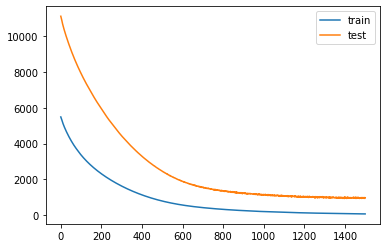

In [402]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [403]:
x_te_reshaped = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))
res = model_k.predict(x_te_reshaped)
ls_test_80["DL_PRED_ENERGY"] = res

<ipython-input-403-2c36332a4a5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_test_80["DL_PRED_ENERGY"] = res


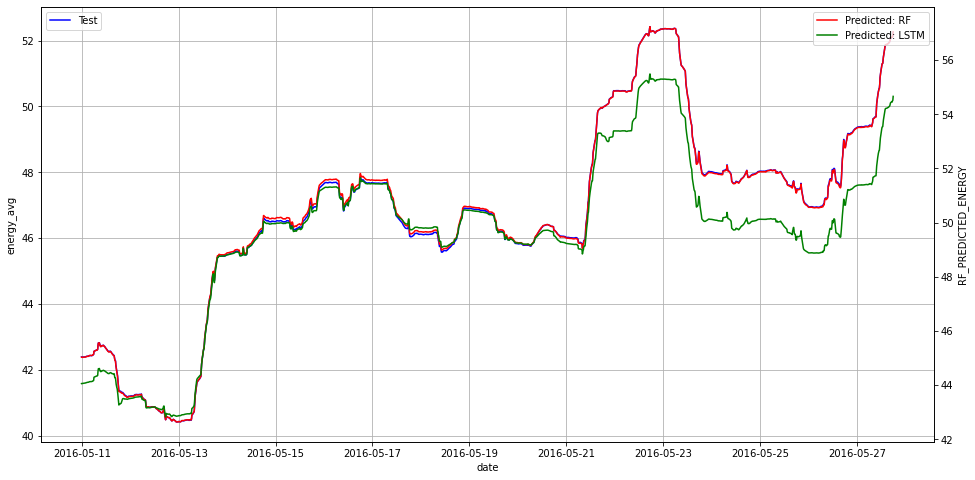

In [404]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_test_80["date"], y = ls_test_80["energy_avg"].rolling(window=1440).mean(),ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_test_80["date"], y = rf_test_80["RF_PREDICTED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_test_80["date"], y = ls_test_80["DL_PRED_ENERGY"].rolling(window=1440).mean(),ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [405]:
x_val_reshaped_ = x_val_scaled.reshape((x_val_scaled.shape[0], 1, x_val_scaled.shape[1]))
res = model_k.predict(x_val_reshaped_)
ls_val_80["DL_PRED_ENERGY"] = res

<ipython-input-405-a8d30b6c1121>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_val_80["DL_PRED_ENERGY"] = res


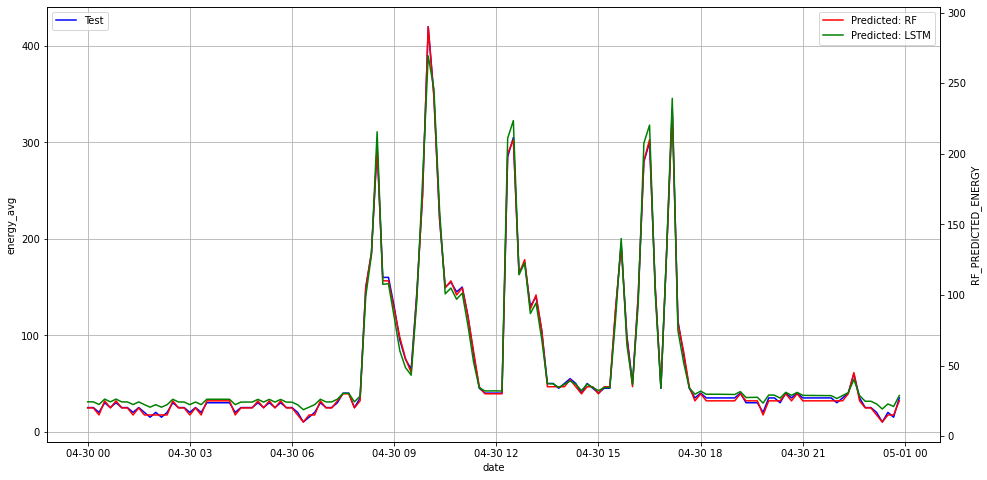

In [406]:
fig, sub = plt.subplots(1,1,figsize=(16,8))
sub2 = sub.twinx()
sns.lineplot(x = ls_val_80["date"], y = ls_val_80["energy_avg"],ax = sub, color="blue", label = "Test");
sns.lineplot(x = ls_val_80["date"], y = rf_val_80["RF_PREDICTED_ENERGY"],ax = sub2, color="red", label = "Predicted: RF");
sns.lineplot(x = ls_val_80["date"], y = ls_val_80["DL_PRED_ENERGY"],ax = sub2, color="green", label = "Predicted: LSTM");
sub.grid()
sub.legend(loc="upper left")
sub2.legend(loc="upper right")

In [407]:
print('RMSE FOR TESTDATA', sqrt(mean_squared_error(ls_test_80.energy_avg, ls_test_80.DL_PRED_ENERGY)))
print('RMSE FOR SINGLE TEST HORIZON', sqrt(mean_squared_error(ls_val_80.energy_avg, ls_val_80.DL_PRED_ENERGY)))

print('MAE FOR TESTDATA', mean_absolute_error(ls_test_80.energy_avg, ls_test_80.DL_PRED_ENERGY))
print('MAE FOR SINGLE TEST HORIZON', mean_absolute_error(ls_val_80.energy_avg, ls_val_80.DL_PRED_ENERGY))

print('MAPE FOR TESTDATA', mean_absolute_percentage_error(ls_test_80.energy_avg, ls_test_80.DL_PRED_ENERGY))
print('MAPE FOR SINGLE TEST HORIZON', mean_absolute_percentage_error(ls_val_80.energy_avg, ls_val_80.DL_PRED_ENERGY))

RMSE FOR TESTDATA 10.208936225320691
RMSE FOR SINGLE TEST HORIZON 31.38668815899741
MAE FOR TESTDATA 4.060431517287412
MAE FOR SINGLE TEST HORIZON 18.509809811909992
MAPE FOR TESTDATA 0.06260728751296016
MAPE FOR SINGLE TEST HORIZON 0.20660164323242292
